<h2>Analytics Practicum I - 2nd Assignment 2021</h2>
<h3>Exploring the Rosetta Stone of Human Capital</h3>

---
> Georgia Vlassi p2822001<br />
> Business Anlytics <br />
> Athens University of Economics and Business <br/>

---

In this assignment we worked on the paper [A Rosetta Stone of Human Capital](https://www.cgdev.org/publication/rosetta-stone-human-capital), by Dev Patel and Justin Sandefur. 

There are different tests that measure reading and writing skills at school among countries in the world. The problem is that not all countries use the same tests. The basic contribution of the authors was to come up with a way to facilitate conversion between test scores in different countries. In this way they have created what they call a "Rosetta Stone of Human Capital", because it allows us to compare human capital across the different countries.

---

### Question 1: Income and Test Results

We have to study the relationship between income and the TIMSS and PIRLS score, as in Section 4.1 and Figure 5 of the original paper.

The two datasets that were used in this question are the `country_scores` and the `WDI_data`.
  
The main scope is to investigate the relationship between logged income and TIMMS, and logged income and PIRLS. 
The summary table of our model and the plots of the two relationships will be implemented.

Before analyzing the data, we should import the following libraries.

* We should install the plotnine package with: pip install --user plotnine 

In [1]:
#Imports
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

#To avoid showing the warnings
pd.options.mode.chained_assignment = None

%matplotlib inline

We import the first dataset named 'country_scores', which includes standardized performance metrics for reading and math for fourth grade students in the countries in the sample. Column 1 lists the country name, and column 2 lists the country abbreviation. Columns 3 and 4 list the portion of people above the "Low International Benchmark" of 400 on the TIMSS Math and Reading scales. Columns 5 and 6 report the median scores on the TIMSS math scale and PIRLS reading scale.

In [2]:
country_scores = pd.read_excel('patel-sandefur-human-capital-final-results.xlsx',sheet_name='Country Scores')
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


We should also import the dataset named 'wdi_data', which contains income data per country as given by the World Bank 

In [3]:
wdi_data = pd.read_csv('WDI_data.csv')
wdi_data

,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
1,Afghanistan,AFG,"School enrollment, primary (% net)",SE.PRM.NENR,..
2,Afghanistan,AFG,"School enrollment, primary (% gross)",SE.PRM.ENRR,107.225357055664
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
4,Albania,ALB,"School enrollment, primary (% net)",SE.PRM.NENR,95.1996002197266
...,...,...,...,...,...
792,NaN,NaN,NaN,NaN,NaN
793,NaN,NaN,NaN,NaN,NaN
794,NaN,NaN,NaN,NaN,NaN
795,Data from database: World Development Indicators,NaN,NaN,NaN,NaN


As our scope is to find the logarithmic GDP per capita, we will check the unique Series Name and create a new dataset including only the GDP per capita.

In [4]:
wdi_data['Series Name'].unique()

array(['GDP per capita, PPP (constant 2011 international $)',
       'School enrollment, primary (% net)',
       'School enrollment, primary (% gross)', nan], dtype=object)

In [5]:
wdi_data = wdi_data.loc[wdi_data['Series Name'].isin(['GDP per capita, PPP (constant 2011 international $)'])]
print(wdi_data.shape)
wdi_data.head()

(264, 5)


,Country Name,Country Code,Series Name,Series Code,2015 [YR2015]
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483
3,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789
6,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895
9,American Samoa,ASM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..
12,Andorra,AND,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,..


It will be useful to create a new dataset named TOTAL_GDP, including both TIMMS and PIRLS columns.

In [6]:
TOTAL_GDP = pd.merge(wdi_data, 
                     country_scores, 
                     on='Country Code', 
                     how='inner')
#Select columns
TOTAL_GDP = TOTAL_GDP[['Country Name', 'Country Code', 'Series Name', 'Median Math Score (TIMSS Scale, 4th Grade)', 'Median Reading Score (PIRLS Scale, 4th Grade)', '2015 [YR2015]']]
# Rename columns
TOTAL_GDP.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)': 'TIMSS'}, inplace=True)
TOTAL_GDP.rename(columns={'Median Reading Score (PIRLS Scale, 4th Grade)': 'PIRLS'}, inplace=True)
TOTAL_GDP.rename(columns={'2015 [YR2015]': 'GDP per Capita (PPP) in 2015'}, inplace=True)
# Print the output
print(TOTAL_GDP.shape)
TOTAL_GDP.head()

(78, 6)


,Country Name,Country Code,Series Name,TIMSS,PIRLS,GDP per Capita (PPP) in 2015
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",406.652557,431.443542,19101.2973920688
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",454.000000,NaN,8195.93364956571
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",520.000000,534.000000,43719.5021648696
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",511.000000,533.000000,44353.8752139122
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",465.000000,467.000000,16698.8636532538


![GDP (PPP) and TIMSS](gdp_timss.svg)

Create the TIMSS dataset by replicating the aforementioned dataset TOTAL_GDP and removing only the Median Reading Scores.

In [7]:
TIMSS_GDP = TOTAL_GDP[['Country Name', 'Country Code', 'Series Name', 'TIMSS', 'GDP per Capita (PPP) in 2015']]
print(TIMSS_GDP.shape)
TIMSS_GDP.head()

(78, 5)


,Country Name,Country Code,Series Name,TIMSS,GDP per Capita (PPP) in 2015
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",406.652557,19101.2973920688
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",454.000000,8195.93364956571
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",520.000000,43719.5021648696
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",511.000000,44353.8752139122
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",465.000000,16698.8636532538


Cleaning data at TIMSS_GDP dataset

In [8]:
TIMSS_GDP.isna().sum()

Country Name                    0
Country Code                    0
Series Name                     0
TIMSS                           7
GDP per Capita (PPP) in 2015    0
dtype: int64

In [9]:
TIMSS_GDP.dropna(inplace=True)
print(TIMSS_GDP.shape)
TIMSS_GDP.head()

(71, 5)


,Country Name,Country Code,Series Name,TIMSS,GDP per Capita (PPP) in 2015
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",406.652557,19101.2973920688
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",454.000000,8195.93364956571
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",520.000000,43719.5021648696
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",511.000000,44353.8752139122
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",465.000000,16698.8636532538


In [10]:
TIMSS_GDP.isna().sum()

Country Name                    0
Country Code                    0
Series Name                     0
TIMSS                           0
GDP per Capita (PPP) in 2015    0
dtype: int64

In [11]:
TIMSS_GDP.dtypes

Country Name                     object
Country Code                     object
Series Name                      object
TIMSS                           float64
GDP per Capita (PPP) in 2015     object
dtype: object

Convert the type of field 'Log GDP per Capita (PPP) in 2015' to float, so as to calculate the logarithms of its values.

In [12]:
TIMSS_GDP = TIMSS_GDP.astype({'GDP per Capita (PPP) in 2015': float})
TIMSS_GDP.dtypes

Country Name                     object
Country Code                     object
Series Name                      object
TIMSS                           float64
GDP per Capita (PPP) in 2015    float64
dtype: object

We will take the logarithms (log-transform) of the GDP per Capita (PPP) in 2015 (renamed to Log GDP per Capita (PPP) in 2015)

In [13]:
#Rename the column, as it will store the logarithmic values
TIMSS_GDP.rename(columns={'GDP per Capita (PPP) in 2015': 'Log GDP per Capita (PPP) in 2015'}, inplace=True)

In [14]:
TIMSS_GDP['Log GDP per Capita (PPP) in 2015'] = np.log(TIMSS_GDP['Log GDP per Capita (PPP) in 2015'])
TIMSS_GDP.head()

,Country Name,Country Code,Series Name,TIMSS,Log GDP per Capita (PPP) in 2015
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",406.652557,9.857512
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",454.000000,9.011393
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",520.000000,10.685550
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",511.000000,10.699955
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",465.000000,9.723096


<h4>Warning: as an error occured with spaces in column's name, only for this step we do the following transformation </h4>

In [15]:
TIMSS_GDP.rename(columns={'Log GDP per Capita (PPP) in 2015': 'Log'}, inplace=True)

In [16]:
TIMSS_R = smf.ols('TIMSS ~ Log', data=TIMSS_GDP)
TIMSS_R = TIMSS_R.fit()
TIMSS_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  TIMSS   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     37.42
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           5.07e-08
Time:                        09:33:30   Log-Likelihood:                -396.25
No. Observations:                  71   AIC:                             796.5
Df Residuals:                      69   BIC:                             801.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.1170     66.734      0.691      0.492     -87.013     179.247
Log           41.7460      6.824      6.117      0.000      28.132      55.360
==============================================================================
Omnibus:                        1.225   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                1.078
Skew:                          -0.298   Prob(JB):                        0.583
Kurtosis:                       2.898   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric, which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.352, that means that our model does not fit very well. Only the 35.2% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is  determined by the addition of independent variables. As the Adj. R-squared is 0.342 which very close to 0.352 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 37.42, and when the probability of the F-statistic is less than 0.05, in our case 5.07e-08, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 46.117 when all the predictors are equal to 0.
* The null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have for logarithmic TIMSS p-value = 0.00 which is less than 0.05. As a result, we have to reject the null hypothesis and assume that the coefficient is statistically significant and relevant to our model. Regarding the p-value of the Intercept, which is 0.492 greater than 0.05 we should not reject the null hypothesis and we conclude that the Intercept is not statistically significant.
* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 1.86 in our case, means that there is homoscedasticity.

In [17]:
#Rename the columns after fitting the model
TIMSS_GDP.rename(columns={'Log' : 'Log GDP per Capita (PPP) in 2015'}, inplace=True)

We should also add an extra column including the residuals for the TIMSS, as it will be used in the second question.

In [18]:
TIMSS_GDP['TIMSS_RESIDUALS'] = TIMSS_R.resid
TIMSS_GDP

,Country Name,Country Code,Series Name,TIMSS,Log GDP per Capita (PPP) in 2015,TIMSS_RESIDUALS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",406.652557,9.857512,-50.975909
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",454.000000,9.011393,31.693559
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",520.000000,10.685550,27.804280
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",511.000000,10.699955,18.202895
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",465.000000,9.723096,12.982843
...,...,...,...,...,...,...
73,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",477.000000,10.059999,10.918500
74,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",437.000000,11.097037,-72.373659
75,United States,USA,"GDP per capita, PPP (constant 2011 internation...",544.000000,10.878600,43.745211
76,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",424.912933,9.895024,-34.281533


Create the plot for TIMSS ~ Log GDP per Capita (PPP) in 2015

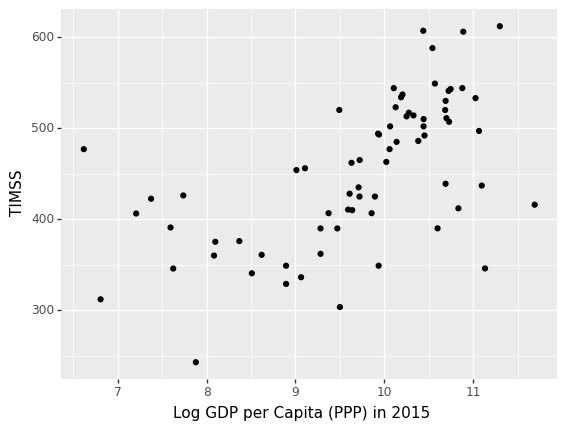

<ggplot: (131875763607)>

In [19]:
ggplot(data=TIMSS_GDP) + geom_point(mapping=aes(x='Log GDP per Capita (PPP) in 2015', y='TIMSS'))

![GDP (PPP) and PIRLS](gdp_pirls.svg)

Create the PIRLS dataset by replicating the dataset TOTAL_GDP and removing only the Median Math Scores

In [20]:
PIRLS_GDP = TOTAL_GDP[['Country Name', 'Country Code', 'Series Name', 'PIRLS', 'GDP per Capita (PPP) in 2015']]
print(PIRLS_GDP.shape)
PIRLS_GDP.head()

(78, 5)


,Country Name,Country Code,Series Name,PIRLS,GDP per Capita (PPP) in 2015
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",431.443542,19101.2973920688
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NaN,8195.93364956571
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",534.000000,43719.5021648696
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",533.000000,44353.8752139122
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",467.000000,16698.8636532538


Cleaning data at PIRLS_GDP dataset

In [21]:
PIRLS_GDP.isna().sum()

Country Name                     0
Country Code                     0
Series Name                      0
PIRLS                           10
GDP per Capita (PPP) in 2015     0
dtype: int64

In [22]:
PIRLS_GDP.dropna(inplace=True)
print(PIRLS_GDP.shape)
PIRLS_GDP.head()

(68, 5)


,Country Name,Country Code,Series Name,PIRLS,GDP per Capita (PPP) in 2015
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",431.443542,19101.2973920688
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",534.000000,43719.5021648696
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",533.000000,44353.8752139122
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",467.000000,16698.8636532538
6,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",394.196686,1987.16714645212


In [23]:
PIRLS_GDP.isna().sum()

Country Name                    0
Country Code                    0
Series Name                     0
PIRLS                           0
GDP per Capita (PPP) in 2015    0
dtype: int64

In [24]:
PIRLS_GDP.dtypes

Country Name                     object
Country Code                     object
Series Name                      object
PIRLS                           float64
GDP per Capita (PPP) in 2015     object
dtype: object

Similar to TIMSS_GDP dataset, we should convert the type of 'Log GDP per Capita (PPP) in 2015' to float, so as to calculate the logarithms of its values.

In [25]:
PIRLS_GDP = PIRLS_GDP.astype({'GDP per Capita (PPP) in 2015': float})
PIRLS_GDP.dtypes

Country Name                     object
Country Code                     object
Series Name                      object
PIRLS                           float64
GDP per Capita (PPP) in 2015    float64
dtype: object

We will take the logarithms (log-transform) of the GDP per Capita (PPP) in 2015 (renamed to Log GDP per Capita (PPP) in 2015.

In [26]:
PIRLS_GDP.rename(columns={'GDP per Capita (PPP) in 2015': 'Log GDP per Capita (PPP) in 2015'}, inplace=True)

In [27]:
PIRLS_GDP['Log GDP per Capita (PPP) in 2015'] = np.log(PIRLS_GDP['Log GDP per Capita (PPP) in 2015'])
PIRLS_GDP.head()

,Country Name,Country Code,Series Name,PIRLS,Log GDP per Capita (PPP) in 2015
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",431.443542,9.857512
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",534.000000,10.685550
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",533.000000,10.699955
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",467.000000,9.723096
6,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",394.196686,7.594465


<h4>Warning: as an error occured with spaces in column's name, only for this step we do the following transformation </h4>

In [28]:
PIRLS_GDP.rename(columns={'Log GDP per Capita (PPP) in 2015': 'Log'}, inplace=True)

In [29]:
PIRLS_R = smf.ols('PIRLS ~ Log', data=PIRLS_GDP)
PIRLS_R = PIRLS_R.fit()
PIRLS_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PIRLS   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     55.61
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.48e-10
Time:                        09:33:31   Log-Likelihood:                -367.97
No. Observations:                  68   AIC:                             739.9
Df Residuals:                      66   BIC:                             744.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6191     57.790      0.737      0.463     -72.762     158.000
Log           43.9124      5.889      7.457      0.000      32.155      55.669
==============================================================================
Omnibus:                       10.020   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.389
Skew:                          -0.951   Prob(JB):                      0.00555
Kurtosis:                       3.226   Cond. No.                         85.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.457, that means that our model does not fit very well. Only the 45.7% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is determined by the addition of independent variables. As the Adj. R-squared is 0.449 which very close to 0.457 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 55.61, and when the probability of the F-statistic is less than 0.05, in our case 2.48e-10, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 42.6191 when all the predictors are equal to 0.
* Τhe null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have for logarithmic TIMSS p-value = 0.00 which is less than 0.05. As a result, we have to reject the null hypothesis and assume that the coefficient is statistically significant and relevant to our model. Regarding the p-value of the Intercept, which is 0.463 greater than 0.05 we should not reject the null hypothesis and we conclude that the Intercept is not statistically significant.

* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 2.089 in our case, means that there is homoscedasticity.

In [30]:
#Rename the column after fitting the model
PIRLS_GDP.rename(columns={'Log' : 'Log GDP per Capita (PPP) in 2015'}, inplace=True)

We should also add an extra column including the residuals for the PIRLS, as it will be used in the second question.

In [31]:
PIRLS_GDP['PIRLS_RESIDUALS'] = PIRLS_R.resid
PIRLS_GDP

,Country Name,Country Code,Series Name,PIRLS,Log GDP per Capita (PPP) in 2015,PIRLS_RESIDUALS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",431.443542,9.857512,-44.042720
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",534.000000,10.685550,22.152588
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",533.000000,10.699955,20.519995
4,Azerbaijan,AZE,"GDP per capita, PPP (constant 2011 internation...",467.000000,9.723096,-2.583750
6,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",394.196686,7.594465,18.086246
...,...,...,...,...,...,...
70,Togo,TGO,"GDP per capita, PPP (constant 2011 internation...",374.490417,7.207394,15.377204
71,Trinidad and Tobago,TTO,"GDP per capita, PPP (constant 2011 internation...",474.000000,10.350845,-23.149715
74,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",440.000000,11.097037,-89.916813
75,United States,USA,"GDP per capita, PPP (constant 2011 internation...",560.000000,10.878600,39.675288


Create the plot for PIRLS ~ Log GDP per Capita (PPP) in 2015

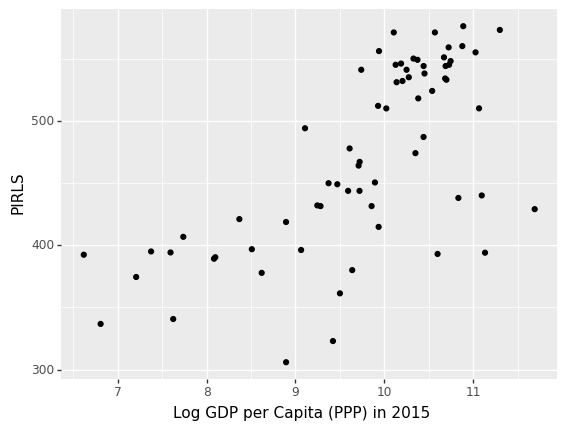

<ggplot: (131875922842)>

In [32]:
ggplot(data=PIRLS_GDP) + geom_point(mapping=aes(x='Log GDP per Capita (PPP) in 2015', y='PIRLS'))

---

### Question 2: Years of Schooling and Test Scores

The main scope of this task is to explore how much years of schooling impact test scores, taking account of the per capita income, as in Section 4.1 and Figure 6 of the original paper. In order to do that, we will take the residuals of the models we created in Question 1; the residuals contain what cannot be explained by income, so we can use them to see how much of what cannot be explained by income can be explained by years of schooling.

The two datasets that were used in this question are the `country_scores` and the `BL2013_MF1599_v2.2`.

We already have the residuals for TIMSS and PIRLS; we have to fit a model for the the logged per capita GDP in 2015 (independent variable) and the years of schooling (dependent variable). We will show the results of our model and we will get the residuals. These residuals describe the years of schooling that cannot be explained by income. Then,we will run a regression between the TIMMS residuals and the schooling residuals, and another regression between the PIRLS residuals and the schooling residuals. Show the model results and figures like the ones below.

We should import the dataset named 'BL2013_MF1599_v2.2', which contains average years of schooling data from Barro, Robert J. and Jong-Wha Lee, A New Data Set of Educational Attainment in the World, 1950-2010, Journal of Development Economics, 2013, 104, 194-198.

In [33]:
avg_years_schooling = pd.read_stata('BL2013_MF1599_v2.2.dta')
print(avg_years_schooling.shape)
avg_years_schooling

(1898, 20)


,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1893,358.0,Ukraine,1990.0,MF,15.0,999.0,5.785368,14.138213,11.648808,59.848248,41.504124,20.228174,12.362464,9.531308,4.706372,4.173123,0.651813,40770.0,UKR,Europe and Central Asia
1894,358.0,Ukraine,1995.0,MF,15.0,999.0,4.284995,10.039333,8.426095,58.694180,40.753365,26.981485,16.553701,10.154778,4.886407,4.397667,0.870704,40989.0,UKR,Europe and Central Asia
1895,358.0,Ukraine,2000.0,MF,15.0,999.0,2.861569,9.811013,7.551663,53.745895,36.992371,33.192432,20.433352,10.453713,4.977168,4.404029,1.072516,40332.0,UKR,Europe and Central Asia
1896,358.0,Ukraine,2005.0,MF,15.0,999.0,1.898582,6.847359,5.919780,54.743999,39.278564,36.510059,22.327957,10.967577,5.042674,4.748143,1.176760,39573.0,UKR,Europe and Central Asia


In [34]:
avg_years_schooling.dtypes

BLcode         float64
country         object
year           float64
sex             object
agefrom        float64
ageto          float64
lu             float32
lp             float32
lpc            float32
ls             float32
lsc            float32
lh             float32
lhc            float32
yr_sch         float32
yr_sch_pri     float32
yr_sch_sec     float32
yr_sch_ter     float32
pop            float64
WBcode          object
region_code     object
dtype: object

Reading the data from 'BL2013_MF1599_v2.2.dta', we observe that the type of field year is float. To continue our analysis we should convert the type to integer

In [35]:
avg_years_schooling['year'] = avg_years_schooling['year'].astype(np.int64)
avg_years_schooling.dtypes

BLcode         float64
country         object
year             int64
sex             object
agefrom        float64
ageto          float64
lu             float32
lp             float32
lpc            float32
ls             float32
lsc            float32
lh             float32
lhc            float32
yr_sch         float32
yr_sch_pri     float32
yr_sch_sec     float32
yr_sch_ter     float32
pop            float64
WBcode          object
region_code     object
dtype: object

Please check the new format of year

In [36]:
print(avg_years_schooling.shape)
avg_years_schooling.head()

(1898, 20)


,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa


The data that we will use for our analysis are the values reported for 2010. We will create a copy only with these records.

In [37]:
avg_years_schooling['year'].unique()

array([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000,
       2005, 2010], dtype=int64)

In [38]:
avg_years_schooling_2010 = avg_years_schooling.loc[avg_years_schooling['year'] == 2010].copy()
print(avg_years_schooling_2010.shape)
avg_years_schooling_2010.head()

(146, 20)


,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
12,1.0,Algeria,2010,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa


In order to combine the above dataset with the 'wdi_data' from Question 1 on field Country Code, we should rename the field WBcode to Country Code.

In [39]:
avg_years_schooling_2010.rename(columns={'WBcode': 'Country Code'}, inplace=True)
avg_years_schooling_2010.head()

,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,Country Code,region_code
12,1.0,Algeria,2010,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa


In [40]:
AVG_2010_SCHOOL_GDP = pd.merge(wdi_data, 
                     avg_years_schooling_2010, 
                     on='Country Code', 
                     how='inner')
print(AVG_2010_SCHOOL_GDP.shape)
AVG_2010_SCHOOL_GDP.head()

(142, 24)


,Country Name,Country Code,Series Name,Series Code,2015 [YR2015],BLcode,country,year,sex,agefrom,...,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,region_code
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,1809.01648820483,79.0,Afghanistan,2010,MF,15.0,...,16.087940,8.646737,6.882809,3.649943,3.847810,2.639048,0.998107,0.210655,19299.0,South Asia
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,10971.2925173789,156.0,Albania,2010,MF,15.0,...,85.780670,42.903282,1.586393,0.926950,9.927752,6.475314,3.402170,0.050267,2431.0,Europe and Central Asia
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,13724.723852895,1.0,Algeria,2010,MF,15.0,...,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,Middle East and North Africa
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,19101.2973920688,67.0,Argentina,2010,MF,15.0,...,48.648952,31.072559,11.178634,2.865633,9.510379,6.565071,2.664423,0.280885,30538.0,Latin America and the Caribbean
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,8195.93364956571,308.0,Armenia,2010,MF,15.0,...,68.886536,57.121227,25.444443,15.033582,10.726531,4.622946,5.294024,0.809561,2452.0,Europe and Central Asia


Some columns could be omitted, so as our analysis to be more flexible

In [41]:
AVG_2010_SCHOOL_GDP = AVG_2010_SCHOOL_GDP[['Country Name', 'Country Code', 'Series Name', '2015 [YR2015]', 'year', 'yr_sch']]

#Rename 2015 [YR2015] to GDP per Capita (PPP) in 2015, to be alligned with previous question
AVG_2010_SCHOOL_GDP.rename(columns={'2015 [YR2015]': 'GDP per Capita (PPP) in 2015'}, inplace=True)
print(AVG_2010_SCHOOL_GDP.shape)
AVG_2010_SCHOOL_GDP.head()

(142, 6)


,Country Name,Country Code,Series Name,GDP per Capita (PPP) in 2015,year,yr_sch
0,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",1809.01648820483,2010,3.847810
1,Albania,ALB,"GDP per capita, PPP (constant 2011 internation...",10971.2925173789,2010,9.927752
2,Algeria,DZA,"GDP per capita, PPP (constant 2011 internation...",13724.723852895,2010,6.678049
3,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",19101.2973920688,2010,9.510379
4,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",8195.93364956571,2010,10.726531


Check if there are NAs in the dataset AVG_2010_SCHOOL_GDP

In [42]:
AVG_2010_SCHOOL_GDP.isna().sum()

Country Name                    0
Country Code                    0
Series Name                     0
GDP per Capita (PPP) in 2015    0
year                            0
yr_sch                          0
dtype: int64

Combine the above dataset with TOTAL_GDP from Question 1.

In [43]:
AVG_2010_SCHOOL_GDP_TOTAL = pd.merge(AVG_2010_SCHOOL_GDP, 
                                     TOTAL_GDP[['Country Code', 'TIMSS', 'PIRLS']], 
                                     on='Country Code', 
                                     how='inner')
AVG_2010_SCHOOL_GDP_TOTAL

,Country Name,Country Code,Series Name,GDP per Capita (PPP) in 2015,year,yr_sch,TIMSS,PIRLS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",19101.2973920688,2010,9.510379,406.652557,431.443542
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",8195.93364956571,2010,10.726531,454.000000,NaN
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",43719.5021648696,2010,11.541207,520.000000,534.000000
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",44353.8752139122,2010,9.603404,511.000000,533.000000
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",43926.474036316,2010,7.060835,439.000000,NaN
...,...,...,...,...,...,...,...,...
67,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",23388.4813019367,2010,7.050123,477.000000,NaN
68,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",65975.3755468552,2010,9.066772,437.000000,440.000000
69,United States,USA,"GDP per capita, PPP (constant 2011 internation...",53029.2933612438,2010,13.182642,544.000000,560.000000
70,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",19831.4458942372,2010,8.171520,424.912933,450.448608


In order to calculate the logarithms of field GDP per Capita (PPP) in 2015 we should convert its type to float.

In [44]:
AVG_2010_SCHOOL_GDP_TOTAL = AVG_2010_SCHOOL_GDP_TOTAL.astype({'GDP per Capita (PPP) in 2015': float})
AVG_2010_SCHOOL_GDP_TOTAL.dtypes

Country Name                     object
Country Code                     object
Series Name                      object
GDP per Capita (PPP) in 2015    float64
year                              int64
yr_sch                          float32
TIMSS                           float64
PIRLS                           float64
dtype: object

We will take the logarithms (log-transform) of the GDP per Capita (PPP) in 2015 (renamed to Log GDP per Capita (PPP) in 2015).

In [45]:
AVG_2010_SCHOOL_GDP_TOTAL.rename(columns={'GDP per Capita (PPP) in 2015': 'Log GDP per Capita (PPP) in 2015'}, inplace=True)
AVG_2010_SCHOOL_GDP_TOTAL.head()

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,year,yr_sch,TIMSS,PIRLS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",19101.297392,2010,9.510379,406.652557,431.443542
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",8195.933650,2010,10.726531,454.000000,NaN
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",43719.502165,2010,11.541207,520.000000,534.000000
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",44353.875214,2010,9.603404,511.000000,533.000000
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",43926.474036,2010,7.060835,439.000000,NaN


In [46]:
AVG_2010_SCHOOL_GDP_TOTAL['Log GDP per Capita (PPP) in 2015'] = np.log(AVG_2010_SCHOOL_GDP_TOTAL['Log GDP per Capita (PPP) in 2015'])
AVG_2010_SCHOOL_GDP_TOTAL.head()

,Country Name,Country Code,Series Name,Log GDP per Capita (PPP) in 2015,year,yr_sch,TIMSS,PIRLS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.857512,2010,9.510379,406.652557,431.443542
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.011393,2010,10.726531,454.000000,NaN
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.685550,2010,11.541207,520.000000,534.000000
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.699955,2010,9.603404,511.000000,533.000000
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",10.690272,2010,7.060835,439.000000,NaN


<h4>Warning: as an error occured with spaces in column's name, only for this step we do the following transformation</h4> 

In [47]:
AVG_2010_SCHOOL_GDP_TOTAL.rename(columns={"Log GDP per Capita (PPP) in 2015": "Log"}, inplace=True)
AVG_2010_SCHOOL_GDP_TOTAL

,Country Name,Country Code,Series Name,Log,year,yr_sch,TIMSS,PIRLS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.857512,2010,9.510379,406.652557,431.443542
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.011393,2010,10.726531,454.000000,NaN
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.685550,2010,11.541207,520.000000,534.000000
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.699955,2010,9.603404,511.000000,533.000000
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",10.690272,2010,7.060835,439.000000,NaN
...,...,...,...,...,...,...,...,...
67,Turkey,TUR,"GDP per capita, PPP (constant 2011 internation...",10.059999,2010,7.050123,477.000000,NaN
68,United Arab Emirates,ARE,"GDP per capita, PPP (constant 2011 internation...",11.097037,2010,9.066772,437.000000,440.000000
69,United States,USA,"GDP per capita, PPP (constant 2011 internation...",10.878600,2010,13.182642,544.000000,560.000000
70,Uruguay,URY,"GDP per capita, PPP (constant 2011 internation...",9.895024,2010,8.171520,424.912933,450.448608


In [48]:
#We have to fit our model before calculating the residuals
AVG_2010_SCHOOL_GDP_TOTAL_R = smf.ols('yr_sch ~ Log', data=AVG_2010_SCHOOL_GDP_TOTAL)
AVG_2010_SCHOOL_GDP_TOTAL_R = AVG_2010_SCHOOL_GDP_TOTAL_R.fit()

#AVG_2010_SCHOOL_GDP_TOTAL_R.summary()

We will calculate the residuals of years of schooling.

In [49]:
AVG_2010_SCHOOL_GDP_TOTAL['Years_of_Schooling_Residualized'] = AVG_2010_SCHOOL_GDP_TOTAL_R.resid
AVG_2010_SCHOOL_GDP_TOTAL.head()

,Country Name,Country Code,Series Name,Log,year,yr_sch,TIMSS,PIRLS,Years_of_Schooling_Residualized
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.857512,2010,9.510379,406.652557,431.443542,0.326660
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.011393,2010,10.726531,454.000000,NaN,3.200686
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.685550,2010,11.541207,520.000000,534.000000,0.735040
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.699955,2010,9.603404,511.000000,533.000000,-1.230990
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",10.690272,2010,7.060835,439.000000,NaN,-3.754586


![Schooling and TIMSS](schooling_timms.svg)

We will cobine the following dataset AVG_2010_SCHOOL_GDP_TOTAL and TIMSS_GDP, to calculate the Years of Schooling (Residualized) regarding the TIMSS score (residualized)

In [50]:
AVG_2010_SCHOOL_GDP_TIMMS = pd.merge(AVG_2010_SCHOOL_GDP_TOTAL, 
                                     TIMSS_GDP[['Country Code', 'TIMSS_RESIDUALS']], 
                                     on='Country Code', 
                                     how='inner')
AVG_2010_SCHOOL_GDP_TIMMS.head()

,Country Name,Country Code,Series Name,Log,year,yr_sch,TIMSS,PIRLS,Years_of_Schooling_Residualized,TIMSS_RESIDUALS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.857512,2010,9.510379,406.652557,431.443542,0.326660,-50.975909
1,Armenia,ARM,"GDP per capita, PPP (constant 2011 internation...",9.011393,2010,10.726531,454.000000,NaN,3.200686,31.693559
2,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.685550,2010,11.541207,520.000000,534.000000,0.735040,27.804280
3,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.699955,2010,9.603404,511.000000,533.000000,-1.230990,18.202895
4,Bahrain,BHR,"GDP per capita, PPP (constant 2011 internation...",10.690272,2010,7.060835,439.000000,NaN,-3.754586,-53.392883


In [51]:
#Keep only the following columns
AVG_2010_SCHOOL_GDP_TIMMS = AVG_2010_SCHOOL_GDP_TIMMS[['Country Code', 'TIMSS_RESIDUALS', 'Years_of_Schooling_Residualized']]
AVG_2010_SCHOOL_GDP_TIMMS

,Country Code,TIMSS_RESIDUALS,Years_of_Schooling_Residualized
0,ARG,-50.975909,0.326660
1,ARM,31.693559,3.200686
2,AUS,27.804280,0.735040
3,AUT,18.202895,-1.230990
4,BHR,-53.392883,-3.754586
...,...,...,...
60,TUR,10.918500,-2.530347
61,ARE,-72.373659,-2.545659
62,USA,43.745211,1.998214
63,URY,-34.281533,-1.085701


Calculate the fitted model.

In [52]:
AVG_2010_SCHOOL_GDP_TIMMS_R = smf.ols("TIMSS_RESIDUALS ~ Years_of_Schooling_Residualized", data=AVG_2010_SCHOOL_GDP_TIMMS)
AVG_2010_SCHOOL_GDP_TIMMS_R = AVG_2010_SCHOOL_GDP_TIMMS_R.fit()
AVG_2010_SCHOOL_GDP_TIMMS_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        TIMSS_RESIDUALS   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     29.30
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.03e-06
Time:                        09:33:32   Log-Likelihood:                -350.69
No. Observations:                  65   AIC:                             705.4
Df Residuals:                      63   BIC:                             709.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.4155      6.734      0.210      0.834     -12.041      14.872
Years_of_Schooling_Residualized    21.5856      3.988      5.413      0.000      13.617      29.554
==============================================================================
Omnibus:                        2.751   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.934
Skew:                           0.370   Prob(JB):                        0.380
Kurtosis:                       3.407   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.317, that means that our model does not fit very well. Only the 31.7% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is  determined by the addition of independent variables. As the Adj. R-squared is 0.307 which very close to 0.317 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 29.30, and when the probability of the F-statistic is less than 0.05, in our case 1.03e-06, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 1.4155 when all the predictors are equal to 0.
* The null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have for logarithmic Years_of_Schooling  p-value = 0.00 which is less than 0.05. As a result, we have to reject the null hypothesis and assume that the coefficient is statistically significant and relevant to our model. Regarding the p-value of the Intercept, which is 0.834 greater than 0.05 we should not reject the null hypothesis and we conclude that the Intercept is not statistically significant.

* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 1.89 in our case, means that there is homoscedasticity.

In [53]:
#Rename the below columns
AVG_2010_SCHOOL_GDP_TIMMS.rename(columns={'TIMSS_RESIDUALS': 'TIMSS score (residualized)'}, inplace=True)
AVG_2010_SCHOOL_GDP_TIMMS.rename(columns={'Years_of_Schooling_Residualized': 'Years of Schooling (Residualized)'}, inplace=True)

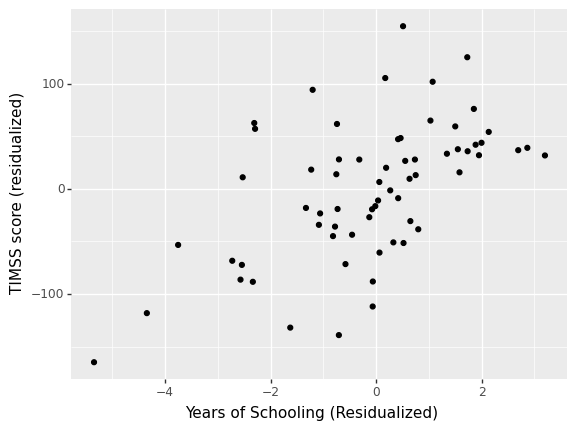

<ggplot: (131875902422)>

In [54]:
ggplot(data=AVG_2010_SCHOOL_GDP_TIMMS) + geom_point(mapping=aes(x='Years of Schooling (Residualized)', y='TIMSS score (residualized)'), na_rm=True)

![Schooling and PIRLS](schooling_pirls.svg)

We will cobine the following dataset AVG_2010_SCHOOL_GDP_TOTAL and PIRLS_GDP, to calculate the Years of Schooling (Residualized) regarding the PIRLS score (residualized)

In [55]:
AVG_2010_SCHOOL_GDP_PIRLS = pd.merge(AVG_2010_SCHOOL_GDP_TOTAL, 
                                     PIRLS_GDP[['Country Code', 'PIRLS_RESIDUALS']], 
                                     on='Country Code', 
                                     how='inner')
AVG_2010_SCHOOL_GDP_PIRLS.head()

,Country Name,Country Code,Series Name,Log,year,yr_sch,TIMSS,PIRLS,Years_of_Schooling_Residualized,PIRLS_RESIDUALS
0,Argentina,ARG,"GDP per capita, PPP (constant 2011 internation...",9.857512,2010,9.510379,406.652557,431.443542,0.326660,-44.042720
1,Australia,AUS,"GDP per capita, PPP (constant 2011 internation...",10.685550,2010,11.541207,520.000000,534.000000,0.735040,22.152588
2,Austria,AUT,"GDP per capita, PPP (constant 2011 internation...",10.699955,2010,9.603404,511.000000,533.000000,-1.230990,20.519995
3,Benin,BEN,"GDP per capita, PPP (constant 2011 internation...",7.594465,2010,4.430164,390.949188,394.196686,-0.319368,18.086246
4,Botswana,BWA,"GDP per capita, PPP (constant 2011 internation...",9.639291,2010,9.554915,410.000000,380.000000,0.798774,-85.903688


In [56]:
#Keep only the following columns
AVG_2010_SCHOOL_GDP_PIRLS = AVG_2010_SCHOOL_GDP_PIRLS[['Country Code', 'PIRLS_RESIDUALS','Years_of_Schooling_Residualized']]
AVG_2010_SCHOOL_GDP_PIRLS

,Country Code,PIRLS_RESIDUALS,Years_of_Schooling_Residualized
0,ARG,-44.042720,0.326660
1,AUS,22.152588,0.735040
2,AUT,20.519995,-1.230990
3,BEN,18.086246,-0.319368
4,BWA,-85.903688,0.798774
...,...,...,...
58,TGO,15.377204,1.500205
59,TTO,-23.149715,0.481800
60,ARE,-89.916813,-2.545659
61,USA,39.675288,1.998214


Calculate the fitted model.

In [57]:
AVG_2010_SCHOOL_GDP_PIRLS_R = smf.ols("PIRLS_RESIDUALS ~ Years_of_Schooling_Residualized", data=AVG_2010_SCHOOL_GDP_PIRLS)
AVG_2010_SCHOOL_GDP_PIRLS_R = AVG_2010_SCHOOL_GDP_PIRLS_R.fit()
AVG_2010_SCHOOL_GDP_PIRLS_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        PIRLS_RESIDUALS   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     33.96
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.27e-07
Time:                        09:33:32   Log-Likelihood:                -326.38
No. Observations:                  63   AIC:                             656.8
Df Residuals:                      61   BIC:                             661.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.6948      5.509      0.126      0.900     -10.320      11.710
Years_of_Schooling_Residualized    20.2531      3.475      5.828      0.000      13.304      27.202
==============================================================================
Omnibus:                       14.661   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.484
Skew:                          -0.843   Prob(JB):                     2.16e-05
Kurtosis:                       5.311   Cond. No.                         1.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.358, that means that our model does not fit very well. Only the 35.8% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is  determined by the addition of independent variables. As the Adj. R-squared is 0.347 which very close to 0.358 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 33.96, and when the probability of the F-statistic is less than 0.05, in our case 2.27e-07, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 0.6948 when all the predictors are equal to 0.
* The null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have for logarithmic Years_of_Schooling  p-value = 0.00 which is less than 0.05. As a result, we have to reject the null hypothesis and assume that the coefficient is statistically significant and relevant to our model. Regarding the p-value of the Intercept, which is 0.900 greater than 0.05 we should not reject the null hypothesis and we conclude that the Intercept is not statistically significant.
* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 2.026 in our case, means that there is homoscedasticity.

In [58]:
#Rename the below columns
AVG_2010_SCHOOL_GDP_PIRLS.rename(columns={'PIRLS_RESIDUALS': 'PIRLS score (residualized)'}, inplace=True)
AVG_2010_SCHOOL_GDP_PIRLS.rename(columns={'Years_of_Schooling_Residualized': 'Years of Schooling (Residualized)'}, inplace=True)

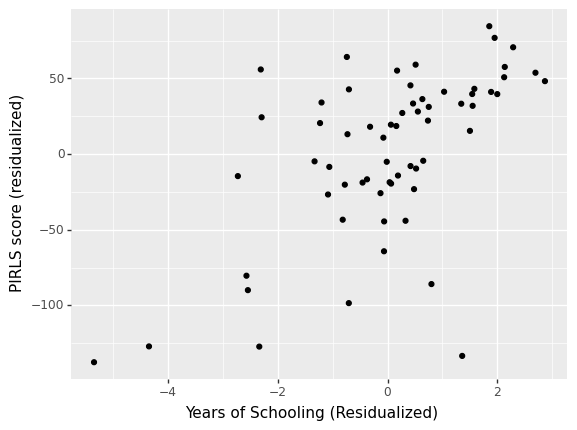

<ggplot: (131875948228)>

In [59]:
ggplot(data=AVG_2010_SCHOOL_GDP_PIRLS) + geom_point(mapping=aes(x='Years of Schooling (Residualized)', y='PIRLS score (residualized)'), na_rm=True)

---

### Question 3: Compare New and Previous Estimates

To see if the results of the authors make sense, we compared their scales with other estimates of learning outcomes, as in Section 4.1 and Figure 7 of the original paper.

The two datasets that were used in this question are the `country_scores` and the `HLO Panel Data (mean, thresh) - Jan 2018`.

The percentage of subjects above the 400 mark is given by the `low_threshold` column in the above file, and this can be used to check the new estimates of the authors. To compare the new and the previous estimates, we ran a Spearman test between the new estimates for TIMSS and the previous estimates, and similarly for PIRLS. We used the latest year for which estimates are available for each country.

We should import the dataset named 'HLO Panel Data (mean, thresh) - Jan 2018', which contains learning outcome estimates from the World Bank, as reported in Altinok, Nadir, Noam Angrist, and Harry Anthony Patrinos, Global Data Set on Education Quality (1965-2015), World Bank Policy Research Working Paper, 2018.

In [60]:
learning_estimates = pd.read_stata('HLO Panel Data (mean, thresh) - Jan 2018.dta')
print(learning_estimates.shape)
learning_estimates

(1849, 6)


,country,idcntry,cntabb,year,HLO,low_threshold
0,"Abu Dhabi, UAE",7842,ADA,1965,NaN,NaN
1,"Abu Dhabi, UAE",7842,ADA,1970,NaN,NaN
2,"Abu Dhabi, UAE",7842,ADA,1975,NaN,NaN
3,"Abu Dhabi, UAE",7842,ADA,1980,NaN,NaN
4,"Abu Dhabi, UAE",7842,ADA,1985,NaN,NaN
...,...,...,...,...,...,...
1844,Zimbabwe,716,ZWE,1995,NaN,NaN
1845,Zimbabwe,716,ZWE,2000,NaN,NaN
1846,Zimbabwe,716,ZWE,2005,342.98999,48.27
1847,Zimbabwe,716,ZWE,2010,NaN,NaN


In [61]:
#Check the type of each field
learning_estimates.dtypes

country           object
idcntry            int32
cntabb            object
year               int16
HLO              float32
low_threshold    float32
dtype: object

Cleaning data at learning_estimates dataset

In [62]:
learning_estimates.isna().sum()

country             0
idcntry             0
cntabb              0
year                0
HLO              1223
low_threshold    1223
dtype: int64

In [63]:
#Drop the above NAs
learning_estimates.dropna(inplace=True)
print(learning_estimates.shape)
learning_estimates.head()

(626, 6)


,country,idcntry,cntabb,year,HLO,low_threshold
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
18,Albania,8,ALB,2000,400.649994,57.750000
19,Albania,8,ALB,2005,399.320007,60.150002
20,Albania,8,ALB,2010,402.750000,61.320000


In order to combine the data with the 'country_scores' from first question on field Country Code, we should rename the field cntabb to Country Code.

In [64]:
learning_estimates.rename(columns={'cntabb' : 'Country Code'}, inplace=True)
learning_estimates

,country,idcntry,Country Code,year,HLO,low_threshold
9,"Abu Dhabi, UAE",7842,ADA,2010,428.679993,73.830002
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
18,Albania,8,ALB,2000,400.649994,57.750000
19,Albania,8,ALB,2005,399.320007,60.150002
20,Albania,8,ALB,2010,402.750000,61.320000
...,...,...,...,...,...,...
1824,Zambia,894,ZMB,2005,324.459991,27.500000
1833,Zanzibar,9834,ZAN,1995,347.700012,17.840000
1834,Zanzibar,9834,ZAN,2000,310.540009,34.330002
1835,Zanzibar,9834,ZAN,2005,321.880005,38.040001


Calculate all the unique Country Codes of the initial 'learning estimates'.

In [65]:
country_codes_all = learning_estimates['Country Code'].unique()
print(country_codes_all.shape)
country_codes_all

(158,)


array(['ADA', 'ALB', 'DZA', 'ARG', 'ARB', 'ARM', 'AUS', 'AUT', 'AZE',
       'BHR', 'BSQ', 'BEL', 'BFL', 'BFR', 'BEN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BGR', 'BFA', 'BDI', 'CMR', 'CAN', 'CAB', 'CBC', 'CNS',
       'COT', 'CQU', 'TCD', 'CHL', 'CHN', 'TWN', 'COL', 'COM', 'CRI',
       'HRV', 'CUB', 'CYP', 'CZE', 'CIV', 'COD', 'DNK', 'DOM', 'ADU',
       'ECU', 'EGY', 'SLV', 'ENG', 'EST', 'FIN', 'FRA', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GRC', 'GTM', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'UIN', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KOR', 'KWT', 'KGZ', 'LVA', 'LBN', 'LSO', 'LBR',
       'LIE', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MLI',
       'MLT', 'QUC', 'MUS', 'MEX', 'NMX', 'UMN', 'MDA', 'MNG', 'MNE',
       'MAR', 'MOZ', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA',
       'US4', 'NIR', 'NOR', 'PSE', 'OMN', 'PAK', 'PAN', 'PRY', 'PER',
       'PHL', 'POL', 'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'SAU', 'SCO',
       'SEN', 'SRB',

For each Country Code, we have to calculate its latest year

In [66]:
#Sort the values by columns 'year' in descending order and 'Country Code', sso as to keep the latest year per Country Code
learning_scores_final = learning_estimates.sort_values(by=['year', 'Country Code'], ascending=[False, True])

#Drop the duplicates in column Country Code in case there are any
learning_scores_final.drop_duplicates(subset=['Country Code'], inplace=True)
learning_scores_final

,country,idcntry,Country Code,year,HLO,low_threshold
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
526,"Dubai, UAE",7841,ADU,2015,510.089996,91.440002
21,Albania,8,ALB,2015,436.730011,70.650002
54,"Argentina, Buenos Aires",974,ARB,2015,414.190002,67.750000
1760,United Arab Emirates,784,ARE,2015,460.489990,80.839996
...,...,...,...,...,...,...
1315,Pakistan,586,PAK,2000,367.829987,58.130001
149,Belgium French,5601,BFR,1995,500.390015,93.320000
182,Bolivia Plurinational State of,68,BOL,1995,370.399994,53.610001
1247,Nigeria,566,NGA,1995,241.179993,45.020000


Merge the above dataset with 'country_scores' from Question 1.

In [67]:
learning_scores = pd.merge(learning_scores_final, 
                            country_scores, 
                            on='Country Code',
                            how='inner')
print(learning_scores.shape)
learning_scores

(77, 11)


,country,idcntry,Country Code,year,HLO,low_threshold,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,United Arab Emirates,784,ARE,2015,460.489990,80.839996,U.A.E.,64.000000,63.982311,437.000000,440.000000
1,Argentina,32,ARG,2015,429.380005,70.860001,Argentina,51.000000,66.000000,406.652557,431.443542
2,Australia,36,AUS,2015,509.220001,91.529999,Australia,90.000000,92.932800,520.000000,534.000000
3,Austria,40,AUT,2015,519.539978,88.510002,Austria,95.302193,97.104111,511.000000,533.000000
4,Bulgaria,100,BGR,2015,490.670013,78.879997,Bulgaria,NaN,93.048439,NaN,541.000000
...,...,...,...,...,...,...,...,...,...,...,...
72,Benin,204,BEN,2005,279.029999,24.350000,Benin,35.000000,35.000000,390.949188,394.196686
73,Burkina Faso,854,BFA,2005,296.880005,37.139999,Burkina Faso,59.000000,45.000000,422.527435,395.008057
74,Cameroun,120,CMR,2005,336.640015,44.500000,Cameroon,41.000000,46.000000,375.240479,390.343994
75,Senegal,686,SEN,2005,319.540009,31.660000,Senegal,56.000000,46.000000,426.151825,406.763458


In [68]:
#Keep only the necessary 
learning_scores = learning_scores[['Country Code', 'Percent Above Math Benchmark (400 on TIMSS Scale)', 'Percent Above Reading Benchmark (400 on PIRLS Scale)', 'year', 'low_threshold']]
learning_scores

,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),year,low_threshold
0,ARE,64.000000,63.982311,2015,80.839996
1,ARG,51.000000,66.000000,2015,70.860001
2,AUS,90.000000,92.932800,2015,91.529999
3,AUT,95.302193,97.104111,2015,88.510002
4,BGR,NaN,93.048439,2015,78.879997
...,...,...,...,...,...
72,BEN,35.000000,35.000000,2005,24.350000
73,BFA,59.000000,45.000000,2005,37.139999
74,CMR,41.000000,46.000000,2005,44.500000
75,SEN,56.000000,46.000000,2005,31.660000


In [69]:
#Rename the following columns
learning_scores.rename(columns={"Percent Above Math Benchmark (400 on TIMSS Scale)": "TIMSS"}, inplace=True)
learning_scores.rename(columns={"Percent Above Reading Benchmark (400 on PIRLS Scale)": "PIRLS"}, inplace=True)
learning_scores.head()

,Country Code,TIMSS,PIRLS,year,low_threshold
0,ARE,64.000000,63.982311,2015,80.839996
1,ARG,51.000000,66.000000,2015,70.860001
2,AUS,90.000000,92.932800,2015,91.529999
3,AUT,95.302193,97.104111,2015,88.510002
4,BGR,NaN,93.048439,2015,78.879997


![TIMMS and World Bank Indicators](new_timms.svg)

We will calculate the parameters for Spearman Test. The Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables.

In [70]:
#Calculate the below as input for Spearman test
X = learning_scores[['low_threshold']]
Y = learning_scores[['TIMSS']]
Z = learning_scores[['PIRLS']]

Spearman test for `low_threshold` and `TIMSS`

In [71]:
print('Spearman:', stats.spearmanr(X, Y, nan_policy='omit'))

Spearman: SpearmanrResult(correlation=0.8973790562032016, pvalue=1.687973764124364e-25)


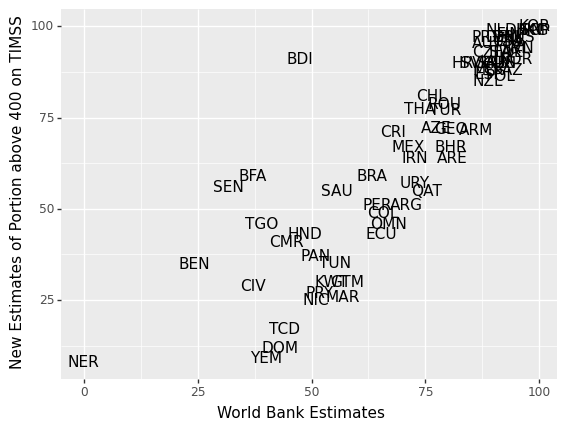

<ggplot: (131875905229)>

In [72]:
ggplot(data=learning_scores, mapping=aes(x='low_threshold', y='TIMSS')) +\
    labs(x='World Bank Estimates', y='New Estimates of Portion above 400 on TIMSS') +\
    geom_text(mapping=aes(label='Country Code'), na_rm=True)

![PIRLS and World Bank Indicators](new_pirls.svg)

Spearman test for `low_threshold` and `PIRLS`

In [73]:
print('Spearman:', stats.spearmanr(X, Z, nan_policy='omit'))

Spearman: SpearmanrResult(correlation=0.9045173418249433, pvalue=5.290584772193416e-25)


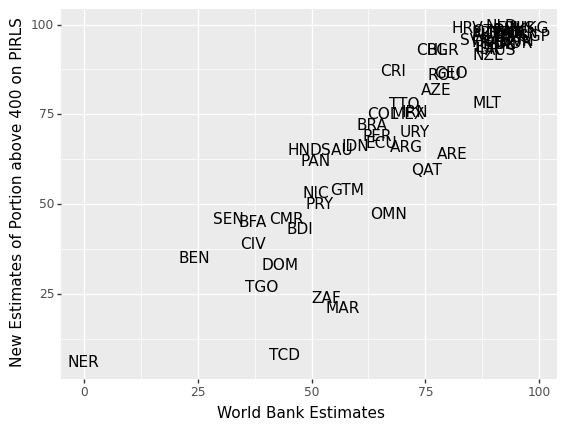

<ggplot: (131874982114)>

In [74]:
ggplot(data=learning_scores, mapping=aes(x='low_threshold', y='PIRLS')) +\
    labs(x='World Bank Estimates', y='New Estimates of Portion above 400 on PIRLS') +\
    geom_text(mapping=aes(label='Country Code'), na_rm=True)

---

### Question 4: Skills Intensity

We will study the relationship between the skills of the people in each country and the value of its exports, as described in Section 4.2 of the original paper. You will do this with performing four regressions:

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In the above:

* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree 

* $\mathrm{highschool}$ is the portion of employees in industry $i$ with at least a high school degree 


We will need the following files:
* `country_scores`

* `usa_00001.csv.gz`

* `cw_ind2000_ind1990ddx.dta`

* `BACI_HS17_Y2018_V202001.csv.gz`

* `cw_hs6_sic87dd.dta`

* `cw_sic87_ind1990ddx.dta`

* `country_codes_V202001.csv.gz`


Show the `country_codes` from Question 1.

In [75]:
country_scores

,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000
...,...,...,...,...,...,...
73,Turkey,TUR,77.000000,NaN,477.000000,NaN
74,Uruguay,URY,57.000000,70.000000,424.912933,450.448608
75,United States,USA,96.000000,97.517357,544.000000,560.000000
76,Yemen,YEM,9.265388,NaN,243.000000,NaN


Import the `usa_00001csv` dataset, in order to identify school and college gradiates.

In [76]:
usa_00001 = pd.read_csv('usa_00001.csv')
print(usa_00001.shape)
usa_00001

(371618, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371613,2000,200004,157985,600.0,2000001579854,12,1,2,606.0,6,62,1,10,4740,708
371614,2000,200004,157985,600.0,2000001579854,12,1,3,494.0,1,10,0,0,9920,0
371615,2000,200004,157986,600.0,2000001579864,6,1,1,556.0,6,62,1,10,7020,337
371616,2000,200004,157986,600.0,2000001579864,6,1,2,600.0,6,65,1,10,130,759


Show the unique education levels

In [77]:
usa_00001['EDUC'].unique()

array([ 8,  6, 10, 11,  4,  7,  2,  3,  0,  1,  5], dtype=int64)

Create a dataset for college graduates

In [78]:
college_graduates = usa_00001.loc[(usa_00001['EDUC'] == 10) | (usa_00001['EDUC'] == 11)]
print(college_graduates.shape)
college_graduates

(69972, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
8,2000,200004,5,600.0,2000000000054,12,1,1,603.0,10,101,3,30,700,959
13,2000,200004,7,600.0,2000000000074,6,1,1,628.0,10,101,1,10,3300,819
14,2000,200004,7,600.0,2000000000074,6,1,2,708.0,11,114,1,10,2600,657
20,2000,200004,11,600.0,2000000000114,17,1,2,518.0,11,116,1,10,2010,837
21,2000,200004,12,200.0,2000000000124,11,1,1,214.0,10,101,3,30,30,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371598,2000,200004,157979,600.0,2000001579794,6,1,1,556.0,10,101,1,10,20,668
371599,2000,200004,157979,600.0,2000001579794,6,1,2,615.0,11,114,3,30,2310,786
371601,2000,200004,157980,600.0,2000001579804,6,1,1,627.0,11,115,1,10,2340,947
371602,2000,200004,157981,600.0,2000001579814,26,1,1,612.0,10,101,3,30,2310,786


Create a dataset for high school graduates

In [79]:
high_school_graduates = usa_00001.loc[(usa_00001['EDUC'] == 6)|(usa_00001['EDUC'] == 7)|(usa_00001['EDUC'] == 8)|(usa_00001['EDUC'] == 10)|(usa_00001['EDUC'] == 11)]
print(high_school_graduates.shape)
high_school_graduates.head()

(242038, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
0,2000,200004,1,600.0,2000000000014,17,1,1,618.0,8,81,1,10,3130,797
1,2000,200004,1,600.0,2000000000014,17,1,2,684.0,8,81,1,10,7210,467
2,2000,200004,2,600.0,2000000000024,48,1,1,618.0,6,62,1,10,8030,359
3,2000,200004,2,600.0,2000000000024,48,1,2,609.0,6,62,3,30,5240,617
4,2000,200004,2,600.0,2000000000024,48,1,3,621.0,6,62,1,10,9360,877


Next we have to group the data by industry.

Initial dataset

In [80]:
usa_00001_industry = usa_00001.groupby(['IND']).sum()
usa_00001_industry

,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,
0,287412000,28741774824,11347780503,105886600.0,287412113478381696,3976219,143905,405211,108371644.0,441309,4611907,186255,1862550,1425563520
17,4108000,410808216,168770778,1358700.0,4108001687715996,55754,2058,3758,1391515.0,11546,118815,3349,33540,6728580
18,2200000,220004400,86906943,714200.0,2200000869073830,35960,1100,1827,723084.0,6574,67690,1537,15392,2961705
19,108000,10800216,4782790,32450.0,108000047828116,1563,54,78,32080.0,428,4376,80,800,185445
27,402000,40200804,15975850,142650.0,402000159759304,5862,201,311,147320.0,1132,11669,270,2708,1290575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,252000,25200504,9295966,94900.0,252000092960164,3555,126,186,96866.0,899,9269,154,1982,803960
978,86000,8600172,3865803,26800.0,86000038658202,1040,43,58,27502.0,323,3323,55,698,274375
979,130000,13000260,5121992,43450.0,130000051220180,2028,66,109,45195.0,501,5121,73,975,338450


College dataset

In [81]:
college_industry = college_graduates.groupby(['IND']).sum()
print(college_industry.shape)
college_industry

(265, 14)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,
0,15532000,1553231064,610596186,5032050.0,15532006105992924,206935,7769,12164,5117532.0,80259,819227,23298,232980,77038720
17,488000,48800976,19882279,131050.0,488000198823766,7063,245,349,133389.0,2496,25388,335,3358,434660
18,248000,24800496,9269538,71600.0,248000092695876,4359,124,178,70935.0,1265,12860,149,1492,169960
19,42000,4200084,1745776,10300.0,42000017457844,702,21,29,10095.0,217,2214,27,270,41740
27,20000,2000040,545859,8200.0,20000005458630,186,10,14,7917.0,103,1050,17,170,60960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,54000,5400108,1657185,19150.0,54000016571958,800,27,35,19135.0,277,2818,27,378,175170
978,22000,2200044,1059346,5550.0,22000010593504,349,11,12,5411.0,115,1178,13,170,69240
979,38000,3800076,1561902,13200.0,38000015619096,569,19,32,14043.0,195,1985,21,282,93320


We have to use the PERWT attribute, which shows how many persons in the US population are represented by a given person in the data.

In [82]:
college_industry = college_industry[['PERWT']]
college_industry.rename(columns={"PERWT": "PERWT_COLLEGE"}, inplace=True)
college_industry.head()

,PERWT_COLLEGE
IND,
0,5117532.0
17,133389.0
18,70935.0
19,10095.0
27,7917.0


Merge the data from college industry with the initial grouped by industry.

In [83]:
college_industry = pd.merge(college_industry, 
                            usa_00001_industry, 
                            on='IND', 
                            how='inner')
print(college_industry.shape)
college_industry

(265, 15)


,PERWT_COLLEGE,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,,
0,5117532.0,287412000,28741774824,11347780503,105886600.0,287412113478381696,3976219,143905,405211,108371644.0,441309,4611907,186255,1862550,1425563520
17,133389.0,4108000,410808216,168770778,1358700.0,4108001687715996,55754,2058,3758,1391515.0,11546,118815,3349,33540,6728580
18,70935.0,2200000,220004400,86906943,714200.0,2200000869073830,35960,1100,1827,723084.0,6574,67690,1537,15392,2961705
19,10095.0,108000,10800216,4782790,32450.0,108000047828116,1563,54,78,32080.0,428,4376,80,800,185445
27,7917.0,402000,40200804,15975850,142650.0,402000159759304,5862,201,311,147320.0,1132,11669,270,2708,1290575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,19135.0,252000,25200504,9295966,94900.0,252000092960164,3555,126,186,96866.0,899,9269,154,1982,803960
978,5411.0,86000,8600172,3865803,26800.0,86000038658202,1040,43,58,27502.0,323,3323,55,698,274375
979,14043.0,130000,13000260,5121992,43450.0,130000051220180,2028,66,109,45195.0,501,5121,73,975,338450


Add new column to calculate the weighted average for the college graduates

In [84]:
college_industry['COLLEGE_WEIGHT_AVG'] = (college_industry['PERWT_COLLEGE']) / college_industry['PERWT'] 
college_industry.head()

,PERWT_COLLEGE,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,COLLEGE_WEIGHT_AVG
IND,,,,,,,,,,,,,,,,
0,5117532.0,287412000,28741774824,11347780503,105886600.0,287412113478381696,3976219,143905,405211,108371644.0,441309,4611907,186255,1862550,1425563520,0.047222
17,133389.0,4108000,410808216,168770778,1358700.0,4108001687715996,55754,2058,3758,1391515.0,11546,118815,3349,33540,6728580,0.095859
18,70935.0,2200000,220004400,86906943,714200.0,2200000869073830,35960,1100,1827,723084.0,6574,67690,1537,15392,2961705,0.098101
19,10095.0,108000,10800216,4782790,32450.0,108000047828116,1563,54,78,32080.0,428,4376,80,800,185445,0.314682
27,7917.0,402000,40200804,15975850,142650.0,402000159759304,5862,201,311,147320.0,1132,11669,270,2708,1290575,0.053740


Repeat the above steps for High school dataset.

In [85]:
high_school_industry = high_school_graduates.groupby(['IND']).sum()
print(high_school_industry.shape)
high_school_industry

(266, 14)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,
0,82818000,8281965636,3266279950,27818350.0,82818032662965456,1129350,41427,68958,28314555.0,291652,2999665,124068,1240680,410777280
17,2748000,274805496,111061366,788600.0,2748001110619156,39961,1376,2139,806904.0,9726,99863,2104,21070,3435640
18,1664000,166403328,66090019,511350.0,1664000660903518,27371,832,1270,516534.0,5744,59049,1090,10914,1869800
19,102000,10200204,4538439,29750.0,102000045384594,1467,51,69,29645.0,417,4265,75,750,173695
27,300000,30000600,11803168,109250.0,300000118032280,4241,150,235,112982.0,969,9993,196,1964,958165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,248000,24800496,9049620,93700.0,248000090496696,3453,124,184,95770.0,895,9224,148,1922,787610
978,84000,8400168,3863273,24300.0,84000038632898,992,42,54,24851.0,320,3293,54,684,268020
979,126000,12600252,5059970,42250.0,126000050599952,1955,64,104,43710.0,491,5021,71,947,332710


In [86]:
high_school_industry = high_school_industry[['PERWT']]
high_school_industry.rename(columns={"PERWT": "PERWT_HIGH_SCHOOL"}, inplace=True)
high_school_industry.head()

,PERWT_HIGH_SCHOOL
IND,
0,28314555.0
17,806904.0
18,516534.0
19,29645.0
27,112982.0


Merge the high school graduates with the initial dataset grouped by industry.

In [87]:
high_school_industry = pd.merge(high_school_industry, 
                            usa_00001_industry, 
                            on='IND', 
                            how='inner')
print(high_school_industry.shape)
high_school_industry

(266, 15)


,PERWT_HIGH_SCHOOL,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010
IND,,,,,,,,,,,,,,,
0,28314555.0,287412000,28741774824,11347780503,105886600.0,287412113478381696,3976219,143905,405211,108371644.0,441309,4611907,186255,1862550,1425563520
17,806904.0,4108000,410808216,168770778,1358700.0,4108001687715996,55754,2058,3758,1391515.0,11546,118815,3349,33540,6728580
18,516534.0,2200000,220004400,86906943,714200.0,2200000869073830,35960,1100,1827,723084.0,6574,67690,1537,15392,2961705
19,29645.0,108000,10800216,4782790,32450.0,108000047828116,1563,54,78,32080.0,428,4376,80,800,185445
27,112982.0,402000,40200804,15975850,142650.0,402000159759304,5862,201,311,147320.0,1132,11669,270,2708,1290575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,95770.0,252000,25200504,9295966,94900.0,252000092960164,3555,126,186,96866.0,899,9269,154,1982,803960
978,24851.0,86000,8600172,3865803,26800.0,86000038658202,1040,43,58,27502.0,323,3323,55,698,274375
979,43710.0,130000,13000260,5121992,43450.0,130000051220180,2028,66,109,45195.0,501,5121,73,975,338450


Add new column to calculate the weighted average for the high school graduates

In [88]:
high_school_industry['HIGH_SCHOOL_WEIGHT_AVG'] = (high_school_industry['PERWT_HIGH_SCHOOL']) / high_school_industry['PERWT'] 
high_school_industry.head()

,PERWT_HIGH_SCHOOL,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,HIGH_SCHOOL_WEIGHT_AVG
IND,,,,,,,,,,,,,,,,
0,28314555.0,287412000,28741774824,11347780503,105886600.0,287412113478381696,3976219,143905,405211,108371644.0,441309,4611907,186255,1862550,1425563520,0.261273
17,806904.0,4108000,410808216,168770778,1358700.0,4108001687715996,55754,2058,3758,1391515.0,11546,118815,3349,33540,6728580,0.579874
18,516534.0,2200000,220004400,86906943,714200.0,2200000869073830,35960,1100,1827,723084.0,6574,67690,1537,15392,2961705,0.714349
19,29645.0,108000,10800216,4782790,32450.0,108000047828116,1563,54,78,32080.0,428,4376,80,800,185445,0.924096
27,112982.0,402000,40200804,15975850,142650.0,402000159759304,5862,201,311,147320.0,1132,11669,270,2708,1290575,0.766916


Merge the final datasets of college and high school graduates to a new one named 'skills_intensity_industry'
* Use left join as high school industry has one more row.

In [89]:
skills_intensity_industry = pd.merge(high_school_industry[['HIGH_SCHOOL_WEIGHT_AVG']], 
                                     college_industry[['COLLEGE_WEIGHT_AVG']], 
                                     on='IND', 
                                     how='left')
print(skills_intensity_industry.shape)
skills_intensity_industry

(266, 2)


,HIGH_SCHOOL_WEIGHT_AVG,COLLEGE_WEIGHT_AVG
IND,,
0,0.261273,0.047222
17,0.579874,0.095859
18,0.714349,0.098101
19,0.924096,0.314682
27,0.766916,0.053740
...,...,...
977,0.988685,0.197541
978,0.903607,0.196749
979,0.967142,0.310720


Import `cw_ind2000_ind1990ddx dataset.dta` file, which maps the industry codes of 2000 to those of 1990, with a weight to account for the differences in the ten years.

In [90]:
cw_ind2000 = pd.read_stata('cw_ind2000_ind1990ddx.dta')
print(cw_ind2000.shape)
cw_ind2000

(712, 3)


,ind2000,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907
...,...,...,...
707,957,922,0.009144
708,957,931,0.983767
709,959,700,0.038986
710,959,910,0.041877


Rename column ind2000 to prepare the dataset for join.

In [91]:
cw_ind2000.rename(columns={"ind2000": "IND"}, inplace=True)
cw_ind2000

,IND,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907
...,...,...,...
707,957,922,0.009144
708,957,931,0.983767
709,959,700,0.038986
710,959,910,0.041877


Merge the above dataset with 'skills_intensity_industry' to get the mapping.

In [92]:
skills_intensity_industry = pd.merge(skills_intensity_industry, 
                                     cw_ind2000, 
                                     on='IND', 
                                     how='inner')
print(skills_intensity_industry.shape)
skills_intensity_industry

(712, 5)


,IND,HIGH_SCHOOL_WEIGHT_AVG,COLLEGE_WEIGHT_AVG,ind1990ddx,weight
0,17,0.579874,0.095859,10,0.994016
1,17,0.579874,0.095859,31,0.002637
2,17,0.579874,0.095859,121,0.001740
3,17,0.579874,0.095859,561,0.001607
4,18,0.714349,0.098101,11,0.990907
...,...,...,...,...,...
707,957,0.954899,0.377846,922,0.009144
708,957,0.954899,0.377846,931,0.983767
709,959,0.985124,0.326841,700,0.038986
710,959,0.985124,0.326841,910,0.041877


Add two new columns to reweight the weighted averages in 'skills_intensity_industry'

In [93]:
skills_intensity_industry['NEW_COLLEGE_WEIGHT_AVG'] = skills_intensity_industry['COLLEGE_WEIGHT_AVG'] * skills_intensity_industry['weight']
skills_intensity_industry['NEW_HIGH_SCHOOL_WEIGHT_AVG'] = skills_intensity_industry['HIGH_SCHOOL_WEIGHT_AVG'] * skills_intensity_industry['weight']
print(skills_intensity_industry.shape)
skills_intensity_industry

(712, 7)


,IND,HIGH_SCHOOL_WEIGHT_AVG,COLLEGE_WEIGHT_AVG,ind1990ddx,weight,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG
0,17,0.579874,0.095859,10,0.994016,0.095285,0.576404
1,17,0.579874,0.095859,31,0.002637,0.000253,0.001529
2,17,0.579874,0.095859,121,0.001740,0.000167,0.001009
3,17,0.579874,0.095859,561,0.001607,0.000154,0.000932
4,18,0.714349,0.098101,11,0.990907,0.097209,0.707853
...,...,...,...,...,...,...,...
707,957,0.954899,0.377846,922,0.009144,0.003455,0.008732
708,957,0.954899,0.377846,931,0.983767,0.371713,0.939398
709,959,0.985124,0.326841,700,0.038986,0.012742,0.038406
710,959,0.985124,0.326841,910,0.041877,0.013687,0.041254


Rename the column ind1990ddx to be more readable.

In [94]:
skills_intensity_industry.rename(columns={"ind1990ddx": "INDUSTRY_1990"}, inplace=True)
skills_intensity_industry

,IND,HIGH_SCHOOL_WEIGHT_AVG,COLLEGE_WEIGHT_AVG,INDUSTRY_1990,weight,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG
0,17,0.579874,0.095859,10,0.994016,0.095285,0.576404
1,17,0.579874,0.095859,31,0.002637,0.000253,0.001529
2,17,0.579874,0.095859,121,0.001740,0.000167,0.001009
3,17,0.579874,0.095859,561,0.001607,0.000154,0.000932
4,18,0.714349,0.098101,11,0.990907,0.097209,0.707853
...,...,...,...,...,...,...,...
707,957,0.954899,0.377846,922,0.009144,0.003455,0.008732
708,957,0.954899,0.377846,931,0.983767,0.371713,0.939398
709,959,0.985124,0.326841,700,0.038986,0.012742,0.038406
710,959,0.985124,0.326841,910,0.041877,0.013687,0.041254


Group them by INDUSTRY_1990 the new weight averages.

In [95]:
skills_intensity_industry = skills_intensity_industry.groupby(['INDUSTRY_1990'])[['NEW_COLLEGE_WEIGHT_AVG', 'NEW_HIGH_SCHOOL_WEIGHT_AVG']].sum()
print(skills_intensity_industry.shape)
skills_intensity_industry

(222, 2)


,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG
INDUSTRY_1990,,
10,0.150558,0.811546
11,0.097209,0.707853
20,0.559366,2.010865
31,0.346429,1.059608
32,0.174943,0.648069
...,...,...
921,0.350704,0.990417
922,0.404272,0.866422
930,0.344167,0.641594


Import the `BACI_HS17_Y2018_V202001.csv` file, which contains records showing the exports of different countries in 2018 for different industry sectors.

In [96]:
baci = pd.read_csv('BACI_HS17_Y2018_V202001.csv')
print(baci.shape)
baci

(7738903, 6)


,t,i,j,k,v,q
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


    t: year
    i: exporter (ISO 3-digit country code)
    j: importer (ISO 3-digit country code)
    k: product category (Harmonized System, HS, 6-digit code)
    v: value of the trade flow (in thousands current USD)
    q: quantity (in metric tons)

Rename columns to be more readable

In [97]:
baci.rename(columns={"t": "YEAR"}, inplace=True)
baci.rename(columns={"i": "EXPORTER"}, inplace=True)
baci.rename(columns={"j": "IMPORTER"}, inplace=True)
baci.rename(columns={"k": "PRODUCT_CATEGORY_HS6"}, inplace=True)
baci.rename(columns={"v": "VALUE_TRADE_FLOW"}, inplace=True)
baci.rename(columns={"q": "QUANTITY"}, inplace=True)
print(baci.shape)
baci

(7738903, 6)


,YEAR,EXPORTER,IMPORTER,PRODUCT_CATEGORY_HS6,VALUE_TRADE_FLOW,QUANTITY
0,2018,4,24,845420,101.397000,26.000000
1,2018,4,24,848180,2.328000,0.007000
2,2018,4,31,570110,1.596000,0.037000
3,2018,4,32,340319,8.699331,0.113000
4,2018,4,32,610910,1.098000,0.013000
...,...,...,...,...,...,...
7738898,2018,894,842,960190,76.858000,5.075000
7738899,2018,894,842,970190,4.519000,0.214000
7738900,2018,894,842,970500,93.706896,2.786751
7738901,2018,894,854,100510,2.141000,0.412000


In [98]:
baci.dtypes

YEAR                      int64
EXPORTER                  int64
IMPORTER                  int64
PRODUCT_CATEGORY_HS6      int64
VALUE_TRADE_FLOW        float64
QUANTITY                float64
dtype: object

Import the `cw_hs6_sic87dd` file, so as to map the HS 6-digit code with Standard Industrial Codes (SIC) SIC87 industry codes

In [99]:
cw_hs6 = pd.read_stata('Replication Files/DATA/cw_hs6_sic87dd.dta')
print(cw_hs6.shape)
cw_hs6

(6752, 4)


,hs6,sic87dd,share,weights_method
0,10110.0,272.0,1.000000,no weights needed
1,10111.0,272.0,1.000000,no weights needed
2,10119.0,272.0,1.000000,no weights needed
3,10120.0,272.0,1.000000,no weights needed
4,10190.0,272.0,1.000000,no weights needed
...,...,...,...,...
6747,640419.0,NaN,0.084449,trade-based allocated 314X imports
6748,640420.0,NaN,0.012955,trade-based allocated 314X imports
6749,640510.0,NaN,0.121528,trade-based allocated 314X imports
6750,640520.0,NaN,0.192258,trade-based allocated 314X imports


In [100]:
cw_hs6.dtypes

hs6                float32
sic87dd            float64
share              float32
weights_method    category
dtype: object

Rename the aforementioned column to be more readable.

In [101]:
cw_hs6.rename(columns={"hs6": "PRODUCT_CATEGORY_HS6"}, inplace=True)
cw_hs6.rename(columns={"sic87dd": "INDUSTRY_CODE"}, inplace=True)
print(cw_hs6.shape)
cw_hs6.head()

(6752, 4)


,PRODUCT_CATEGORY_HS6,INDUSTRY_CODE,share,weights_method
0,10110.0,272.0,1.0,no weights needed
1,10111.0,272.0,1.0,no weights needed
2,10119.0,272.0,1.0,no weights needed
3,10120.0,272.0,1.0,no weights needed
4,10190.0,272.0,1.0,no weights needed


We need to adjust the value of the trade flow of the 'baci' file with the share column of 'cw_hs6'.
In order to achieve that, we should merge the two datasets.

In [102]:
baci_cw = pd.merge(baci, 
                   cw_hs6, 
                   on='PRODUCT_CATEGORY_HS6', 
                   how='inner')
print(baci_cw.shape)
baci_cw.head()

(9631896, 9)


,YEAR,EXPORTER,IMPORTER,PRODUCT_CATEGORY_HS6,VALUE_TRADE_FLOW,QUANTITY,INDUSTRY_CODE,share,weights_method
0,2018,4,24,845420,101.397000,26.000,3321.0,0.636426,trade-based
1,2018,4,24,845420,101.397000,26.000,3559.0,0.363574,trade-based
2,2018,36,288,845420,16.384946,0.177,3321.0,0.636426,trade-based
3,2018,36,288,845420,16.384946,0.177,3559.0,0.363574,trade-based
4,2018,36,360,845420,7.109000,0.017,3321.0,0.636426,trade-based


In [103]:
baci_cw['NEW_VALUE_TRADE_FLOW'] = baci_cw['VALUE_TRADE_FLOW'] * baci_cw['share']
print(baci_cw.shape)
baci_cw

(9631896, 10)


,YEAR,EXPORTER,IMPORTER,PRODUCT_CATEGORY_HS6,VALUE_TRADE_FLOW,QUANTITY,INDUSTRY_CODE,share,weights_method,NEW_VALUE_TRADE_FLOW
0,2018,4,24,845420,101.397000,26.000000,3321.0,0.636426,trade-based,64.531708
1,2018,4,24,845420,101.397000,26.000000,3559.0,0.363574,trade-based,36.865292
2,2018,36,288,845420,16.384946,0.177000,3321.0,0.636426,trade-based,10.427809
3,2018,36,288,845420,16.384946,0.177000,3559.0,0.363574,trade-based,5.957137
4,2018,36,360,845420,7.109000,0.017000,3321.0,0.636426,trade-based,4.524354
...,...,...,...,...,...,...,...,...,...,...
9631891,2018,842,124,811251,3.370410,0.019558,3399.0,1.000000,no weights needed,3.370410
9631892,2018,842,156,811251,3.005000,0.002000,3399.0,1.000000,no weights needed,3.005000
9631893,2018,842,276,811251,31.709764,0.186699,3399.0,1.000000,no weights needed,31.709764
9631894,2018,842,410,811251,20.110000,0.010000,3399.0,1.000000,no weights needed,20.110000


We have to group the trade flow by exporter and SIC87 industry code, so that we have the total value per exporter and industry.

In [104]:
baci_cw_final = baci_cw.groupby(['EXPORTER', 'INDUSTRY_CODE'])['NEW_VALUE_TRADE_FLOW'].sum().to_frame().reset_index()
print(baci_cw_final.shape)
baci_cw_final

(67628, 3)


,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW
0,4,119.0,68290.428330
1,4,131.0,39698.892614
2,4,132.0,43.993665
3,4,134.0,380.462682
4,4,139.0,13308.065785
...,...,...,...
67623,894,3996.0,1.893083
67624,894,3999.0,4143.753862
67625,894,9100.0,45340.133460
67626,894,9200.0,2643.833137


Finally, we will use the `cw_sic87_ind1990ddx` file to map the SIC87 industry codes to the 1990 census industry codes.

In [105]:
cw_1990 = pd.read_stata('cw_sic87_ind1990ddx.dta')
print(cw_1990.shape)
cw_1990

(1004, 2)


,ind1990ddx,sic87
0,10,111
1,10,112
2,10,115
3,10,116
4,10,119
...,...,...
999,931,9641
1000,931,9651
1001,931,9661
1002,932,9711


Rename the columns to be more readable.

In [106]:
cw_1990.rename(columns={"ind1990ddx": "INDUSTRY_1990"}, inplace=True)
cw_1990.rename(columns={"sic87": "INDUSTRY_CODE"}, inplace=True)

Merge the above dataset with 'baci_cw_final' to a final dataset named 'exports'

In [107]:
exports = pd.merge(baci_cw_final, 
                   cw_1990, 
                   on='INDUSTRY_CODE', 
                   how='inner')
print(exports.shape)
exports

(67052, 4)


,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990
0,4,119.0,68290.428330,10
1,8,119.0,480.879539,10
2,12,119.0,104.191222,10
3,16,119.0,2.329000,10
4,20,119.0,0.143736,10
...,...,...,...,...
67047,757,3761.0,6610.981339,362
67048,784,3761.0,11004.443775,362
67049,792,3761.0,28.168526,362
67050,826,3761.0,137409.188156,362


The exporter countries are given with the ISO 3-digit country codes, but we need to three letter country code that is used in the rest of our data. We have to import the `country_codes_V202001.csv` file.

In [108]:
country_codes = pd.read_csv('country_codes_V202001.csv')
print(country_codes.shape)
country_codes

(227, 5)


,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND
...,...,...,...,...,...
222,876,Wallis and Futuna Isds,Wallis and Futuna Islands,WF,WLF
223,882,Samoa,Samoa,WS,WSM
224,887,Yemen,Yemen,YE,YEM
225,891,Serbia and Montenegro,Serbia and Montenegro,CS,SCG


We should rename the country_code in order to merge this dataset with exports.

In [109]:
country_codes.rename(columns={"country_code": "EXPORTER"}, inplace=True)
country_codes.head()

,EXPORTER,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND


In [110]:
exports = pd.merge(exports, 
                   country_codes, 
                   on='EXPORTER', 
                   how='inner')
print(exports.shape)
exports.head()

(67052, 8)


,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,119.0,68290.428330,10,Afghanistan,Afghanistan,AF,AFG
1,4,131.0,39698.892614,10,Afghanistan,Afghanistan,AF,AFG
2,4,132.0,43.993665,10,Afghanistan,Afghanistan,AF,AFG
3,4,134.0,380.462682,10,Afghanistan,Afghanistan,AF,AFG
4,4,139.0,13308.065785,10,Afghanistan,Afghanistan,AF,AFG


Rename the column iso_3digit_alpha in order to merge this dataset with `country_scores` from Question 1.

In [111]:
exports.rename(columns={"iso_3digit_alpha": "Country Code"}, inplace=True)
exports.head()

,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code
0,4,119.0,68290.428330,10,Afghanistan,Afghanistan,AF,AFG
1,4,131.0,39698.892614,10,Afghanistan,Afghanistan,AF,AFG
2,4,132.0,43.993665,10,Afghanistan,Afghanistan,AF,AFG
3,4,134.0,380.462682,10,Afghanistan,Afghanistan,AF,AFG
4,4,139.0,13308.065785,10,Afghanistan,Afghanistan,AF,AFG


In [112]:
export_country_scores = pd.merge(exports, 
                                 country_scores, 
                                 on='Country Code', 
                                 how='inner')
print(export_country_scores.shape)
export_country_scores.head()

(30370, 13)


,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,31,119.0,2312.346783,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0
1,31,131.0,80377.093494,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0
2,31,132.0,12685.514992,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0
3,31,134.0,29591.396652,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0
4,31,139.0,5056.142027,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0


Merge the datasets `export_country_scores` with `skills_intensity_industry`.

In [113]:
final = pd.merge(export_country_scores, 
                 skills_intensity_industry, 
                 on='INDUSTRY_1990', 
                 how='inner')
print(final.shape)
final

(30370, 15)


,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG
0,31,119.0,2312.346783,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
1,31,131.0,80377.093494,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
2,31,132.0,12685.514992,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
3,31,134.0,29591.396652,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
4,31,139.0,5056.142027,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30365,788,3764.0,4.980593,362,Tunisia,Tunisia,TN,TUN,Tunisia,35.134598,NaN,362.0,NaN,0.499685,0.968757
30366,792,3764.0,129.028543,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757
30367,792,3761.0,28.168526,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757
30368,842,3764.0,57349.948587,362,USA,"USA, Puerto Rico and US Virgin Islands",US,USA,United States,96.000000,97.517357,544.0,560.0,0.499685,0.968757


As mentioned we have to divide the TIMSS score and PIRLS score by 1000:
* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

In [114]:
final.rename(columns={"Median Math Score (TIMSS Scale, 4th Grade)": "TIMSS_Scale"}, inplace=True)
final.rename(columns={"Median Reading Score (PIRLS Scale, 4th Grade)": "PIRLS_Scale"}, inplace=True)
final

,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS_Scale,PIRLS_Scale,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG
0,31,119.0,2312.346783,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
1,31,131.0,80377.093494,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
2,31,132.0,12685.514992,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
3,31,134.0,29591.396652,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
4,31,139.0,5056.142027,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30365,788,3764.0,4.980593,362,Tunisia,Tunisia,TN,TUN,Tunisia,35.134598,NaN,362.0,NaN,0.499685,0.968757
30366,792,3764.0,129.028543,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757
30367,792,3761.0,28.168526,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757
30368,842,3764.0,57349.948587,362,USA,"USA, Puerto Rico and US Virgin Islands",US,USA,United States,96.000000,97.517357,544.0,560.0,0.499685,0.968757


In [115]:
final['TIMSS'] = final['TIMSS_Scale'] / 1000
final['PIRLS'] = final['PIRLS_Scale'] / 1000
final

,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS_Scale,PIRLS_Scale,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG,TIMSS,PIRLS
0,31,119.0,2312.346783,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
1,31,131.0,80377.093494,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
2,31,132.0,12685.514992,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
3,31,134.0,29591.396652,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
4,31,139.0,5056.142027,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30365,788,3764.0,4.980593,362,Tunisia,Tunisia,TN,TUN,Tunisia,35.134598,NaN,362.0,NaN,0.499685,0.968757,0.362,NaN
30366,792,3764.0,129.028543,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757,0.477,NaN
30367,792,3761.0,28.168526,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757,0.477,NaN
30368,842,3764.0,57349.948587,362,USA,"USA, Puerto Rico and US Virgin Islands",US,USA,United States,96.000000,97.517357,544.0,560.0,0.499685,0.968757,0.544,0.560


In the first regression we will investigate the relationship between the logged value of exports in the country and the TIMSS score possessed by the college graduates in the country.

In [116]:
final['NEW_VALUE_TRADE_FLOW'] = np.log(final['NEW_VALUE_TRADE_FLOW'])
final

,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS_Scale,PIRLS_Scale,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG,TIMSS,PIRLS
0,31,119.0,7.746018,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
1,31,131.0,11.294485,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
2,31,132.0,9.448216,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
3,31,134.0,10.295239,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
4,31,139.0,8.528359,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30365,788,3764.0,1.605549,362,Tunisia,Tunisia,TN,TUN,Tunisia,35.134598,NaN,362.0,NaN,0.499685,0.968757,0.362,NaN
30366,792,3764.0,4.860034,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757,0.477,NaN
30367,792,3761.0,3.338205,362,Turkey,Turkey,TR,TUR,Turkey,77.000000,NaN,477.0,NaN,0.499685,0.968757,0.477,NaN
30368,842,3764.0,10.956927,362,USA,"USA, Puerto Rico and US Virgin Islands",US,USA,United States,96.000000,97.517357,544.0,560.0,0.499685,0.968757,0.544,0.560


<h4>Warning: as an error occured with spaces in column's name</h4>

In [117]:
final.rename(columns={"Country Code": "Country_Code"}, inplace=True)

1st Regression: $$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

In [118]:
#Drop the NAs at TIMSS column
final_timss = final.copy()
final_timss.dropna(subset=['TIMSS'], inplace=True)
print(final_timss.shape)
final_timss.head()

(27490, 17)


,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country_Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS_Scale,PIRLS_Scale,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG,TIMSS,PIRLS
0,31,119.0,7.746018,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
1,31,131.0,11.294485,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
2,31,132.0,9.448216,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
3,31,134.0,10.295239,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
4,31,139.0,8.528359,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467


In [119]:
TIMSS_COLLEGE_R= smf.ols("NEW_VALUE_TRADE_FLOW ~ TIMSS:NEW_COLLEGE_WEIGHT_AVG + C(INDUSTRY_1990) + C(Country_Code)", data=final_timss)
TIMSS_COLLEGE_R = TIMSS_COLLEGE_R.fit()
TIMSS_COLLEGE_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     NEW_VALUE_TRADE_FLOW   R-squared:                       0.607
Model:                              OLS   Adj. R-squared:                  0.605
Method:                   Least Squares   F-statistic:                     280.0
Date:                  Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                          09:33:48   Log-Likelihood:                -63026.
No. Observations:                 27490   AIC:                         1.264e+05
Df Residuals:                     27338   BIC:                         1.276e+05
Df Model:                           151                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        9.9422      0.162     61.259      0.000       9.624      10.260
C(INDUSTRY_1990)[T.11]          -2.4785      0.139    -17.892      0.000      -2.750      -2.207
C(INDUSTRY_1990)[T.31]          -0.1795      0.324     -0.553      0.580      -0.816       0.456
C(INDUSTRY_1990)[T.32]          -0.6361      0.193     -3.294      0.001      -1.015      -0.258
C(INDUSTRY_1990)[T.40]          -0.9261      0.148     -6.237      0.000      -1.217      -0.635
C(INDUSTRY_1990)[T.41]          -1.0288      0.282     -3.643      0.000      -1.582      -0.475
C(INDUSTRY_1990)[T.42]           1.9990      0.374      5.352      0.000       1.267       2.731
C(INDUSTRY_1990)[T.50]          -0.5256      0.142     -3.699      0.000      -0.804      -0.247
C(INDUSTRY_1990)[T.100]          3.0076      0.231     13.046      0.000       2.556       3.459
C(INDUSTRY_1990)[T.101]          1.1434      0.160      7.164      0.000       0.831       1.456
C(INDUSTRY_1990)[T.102]          1.5264      0.152     10.039      0.000       1.228       1.824
C(INDUSTRY_1990)[T.110]          0.4860      0.137      3.553      0.000       0.218       0.754
C(INDUSTRY_1990)[T.111]          2.1740      0.301      7.215      0.000       1.583       2.765
C(INDUSTRY_1990)[T.112]          1.4080      0.155      9.079      0.000       1.104       1.712
C(INDUSTRY_1990)[T.120]          0.1484      0.150      0.992      0.321      -0.145       0.442
C(INDUSTRY_1990)[T.121]          0.6988      0.119      5.888      0.000       0.466       0.931
C(INDUSTRY_1990)[T.130]         -1.3117      0.191     -6.866      0.000      -1.686      -0.937
C(INDUSTRY_1990)[T.132]         -1.7212      0.182     -9.469      0.000      -2.078      -1.365
C(INDUSTRY_1990)[T.141]         -0.0634      0.302     -0.210      0.834      -0.656       0.529
C(INDUSTRY_1990)[T.142]          0.1727      0.144      1.198      0.231      -0.110       0.455
C(INDUSTRY_1990)[T.150]          0.2009      0.169      1.187      0.235      -0.131       0.533
C(INDUSTRY_1990)[T.151]         -0.7914      0.138     -5.719      0.000      -1.063      -0.520
C(INDUSTRY_1990)[T.152]         -0.4180      0.141     -2.969      0.003      -0.694      -0.142
C(INDUSTRY_1990)[T.160]          1.5077      0.230      6.562      0.000       1.057       1.958
C(INDUSTRY_1990)[T.161]         -0.5404      0.133     -4.075      0.000      -0.800      -0.280
C(INDUSTRY_1990)[T.162]         -0.7699      0.164     -4.705      0.000      -1.091      -0.449
C(INDUSTRY_1990)[T.171]         -4.7647      0.327    -14.579      0.000      -5.405      -4.124
C(INDUSTRY_1990)[T.172]         -4.6736      0.402    -11.633      0.000      -5.461      -3.886
C(INDUSTRY_1990)[T.180]          0.6480      0.172    

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.607, that means that our model fits well. Only the 60.7% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is  determined by the addition of independent variables. As the Adj. R-squared is 0.605 which very close to 0.607 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 280, and when the probability of the F-statistic is less than 0.05, in our case 0, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 9.942 when all the predictors are equal to 0.
* The null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have a lot coeficients, so we will not explain each of them. As a conclusion, if the p-value of the coefficient is less than 0.05, we must reject the null hypothesis and assume that this coefficient is statistically significant and relevant to our model.
* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 1.775 in our case, means that there is homoscedasticity.

2nd Regression: $$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

In [120]:
#Drop the NAs at PIRLS column
final_pirls = final.copy()
final_pirls.dropna(subset=['PIRLS'], inplace=True)
print(final_pirls.shape)
final_pirls.head()

(26401, 17)


,EXPORTER,INDUSTRY_CODE,NEW_VALUE_TRADE_FLOW,INDUSTRY_1990,country_name_abbreviation,country_name_full,iso_2digit_alpha,Country_Code,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),TIMSS_Scale,PIRLS_Scale,NEW_COLLEGE_WEIGHT_AVG,NEW_HIGH_SCHOOL_WEIGHT_AVG,TIMSS,PIRLS
0,31,119.0,7.746018,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
1,31,131.0,11.294485,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
2,31,132.0,9.448216,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
3,31,134.0,10.295239,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467
4,31,139.0,8.528359,10,Azerbaijan,Azerbaijan,AZ,AZE,Azerbaijan,72.284508,81.859566,465.0,467.0,0.150558,0.811546,0.465,0.467


In [121]:
PIRLS_COLLEGE_R = smf.ols("NEW_VALUE_TRADE_FLOW ~ PIRLS:NEW_COLLEGE_WEIGHT_AVG + C(INDUSTRY_1990) + C(Country_Code)", data=final_pirls)
PIRLS_COLLEGE_R = PIRLS_COLLEGE_R.fit()
PIRLS_COLLEGE_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     NEW_VALUE_TRADE_FLOW   R-squared:                       0.616
Model:                              OLS   Adj. R-squared:                  0.614
Method:                   Least Squares   F-statistic:                     284.3
Date:                  Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                          09:33:49   Log-Likelihood:                -60244.
No. Observations:                 26401   AIC:                         1.208e+05
Df Residuals:                     26252   BIC:                         1.220e+05
Df Model:                           148                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       10.0597      0.166     60.455      0.000       9.734      10.386
C(INDUSTRY_1990)[T.11]          -2.4886      0.141    -17.675      0.000      -2.765      -2.213
C(INDUSTRY_1990)[T.31]           0.0077      0.335      0.023      0.982      -0.650       0.665
C(INDUSTRY_1990)[T.32]          -0.7544      0.196     -3.849      0.000      -1.139      -0.370
C(INDUSTRY_1990)[T.40]          -0.7990      0.150     -5.326      0.000      -1.093      -0.505
C(INDUSTRY_1990)[T.41]          -0.9946      0.282     -3.526      0.000      -1.547      -0.442
C(INDUSTRY_1990)[T.42]           2.0959      0.412      5.082      0.000       1.288       2.904
C(INDUSTRY_1990)[T.50]          -0.5823      0.146     -3.977      0.000      -0.869      -0.295
C(INDUSTRY_1990)[T.100]          2.9389      0.235     12.500      0.000       2.478       3.400
C(INDUSTRY_1990)[T.101]          1.0745      0.163      6.597      0.000       0.755       1.394
C(INDUSTRY_1990)[T.102]          1.5027      0.154      9.732      0.000       1.200       1.805
C(INDUSTRY_1990)[T.110]          0.4839      0.138      3.505      0.000       0.213       0.755
C(INDUSTRY_1990)[T.111]          2.1208      0.305      6.950      0.000       1.523       2.719
C(INDUSTRY_1990)[T.112]          1.4321      0.158      9.084      0.000       1.123       1.741
C(INDUSTRY_1990)[T.120]          0.2290      0.152      1.502      0.133      -0.070       0.528
C(INDUSTRY_1990)[T.121]          0.6646      0.121      5.513      0.000       0.428       0.901
C(INDUSTRY_1990)[T.130]         -1.5606      0.191     -8.190      0.000      -1.934      -1.187
C(INDUSTRY_1990)[T.132]         -1.9657      0.186    -10.551      0.000      -2.331      -1.601
C(INDUSTRY_1990)[T.141]         -0.1253      0.306     -0.409      0.683      -0.726       0.475
C(INDUSTRY_1990)[T.142]          0.0476      0.146      0.326      0.744      -0.239       0.334
C(INDUSTRY_1990)[T.150]         -0.0137      0.175     -0.078      0.938      -0.358       0.330
C(INDUSTRY_1990)[T.151]         -0.9094      0.150     -6.073      0.000      -1.203      -0.616
C(INDUSTRY_1990)[T.152]         -0.5397      0.144     -3.757      0.000      -0.821      -0.258
C(INDUSTRY_1990)[T.160]          1.6924      0.232      7.284      0.000       1.237       2.148
C(INDUSTRY_1990)[T.161]         -0.5510      0.134     -4.106      0.000      -0.814      -0.288
C(INDUSTRY_1990)[T.162]         -0.8674      0.167     -5.187      0.000      -1.195      -0.540
C(INDUSTRY_1990)[T.171]         -4.8001      0.332    -14.457      0.000      -5.451      -4.149
C(INDUSTRY_1990)[T.172]         -4.5629      0.457     -9.983      0.000      -5.459      -3.667
C(INDUSTRY_1990)[T.180]          0.6164      0.174    

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.616, that means that our model fits well. Only the 61.6% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is  determined by the addition of independent variables. As the Adj. R-squared is 0.614 which very close to 0.616 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 284.3, and when the probability of the F-statistic is less than 0.05, in our case 0, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 10.0597 when all the predictors are equal to 0.
* The null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have a lot coeficients, so we will not explain each of them. As a conclusion, if the p-value of the coefficient is less than 0.05, we must reject the null hypothesis and assume that this coefficient is statistically significant and relevant to our model.
* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 1.800 in our case, means that there is homoscedasticity.

3rd Regression: $$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In [122]:
TIMSS_HIGH_SCHOOL_R = smf.ols("NEW_VALUE_TRADE_FLOW ~ TIMSS:NEW_HIGH_SCHOOL_WEIGHT_AVG + C(INDUSTRY_1990) + C(Country_Code)", data=final_timss)
TIMSS_HIGH_SCHOOL_R = TIMSS_HIGH_SCHOOL_R.fit()
TIMSS_HIGH_SCHOOL_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     NEW_VALUE_TRADE_FLOW   R-squared:                       0.607
Model:                              OLS   Adj. R-squared:                  0.605
Method:                   Least Squares   F-statistic:                     279.4
Date:                  Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                          09:33:50   Log-Likelihood:                -63043.
No. Observations:                 27490   AIC:                         1.264e+05
Df Residuals:                     27338   BIC:                         1.276e+05
Df Model:                           151                                         
Covariance Type:              nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            9.8972      0.195     50.710      0.000       9.515      10.280
C(INDUSTRY_1990)[T.11]              -2.6481      0.136    -19.531      0.000      -2.914      -2.382
C(INDUSTRY_1990)[T.31]               0.5394      0.304      1.773      0.076      -0.057       1.136
C(INDUSTRY_1990)[T.32]              -0.3553      0.195     -1.822      0.068      -0.738       0.027
C(INDUSTRY_1990)[T.40]              -1.0485      0.150     -7.010      0.000      -1.342      -0.755
C(INDUSTRY_1990)[T.41]              -1.5239      0.274     -5.554      0.000      -2.062      -0.986
C(INDUSTRY_1990)[T.42]               3.2774      0.302     10.836      0.000       2.685       3.870
C(INDUSTRY_1990)[T.50]              -0.9485      0.133     -7.142      0.000      -1.209      -0.688
C(INDUSTRY_1990)[T.100]              2.6449      0.223     11.840      0.000       2.207       3.083
C(INDUSTRY_1990)[T.101]              0.8072      0.155      5.194      0.000       0.503       1.112
C(INDUSTRY_1990)[T.102]              1.4121      0.151      9.355      0.000       1.116       1.708
C(INDUSTRY_1990)[T.110]              0.6314      0.139      4.536      0.000       0.359       0.904
C(INDUSTRY_1990)[T.111]              2.1808      0.302      7.210      0.000       1.588       2.774
C(INDUSTRY_1990)[T.112]              1.2625      0.153      8.243      0.000       0.962       1.563
C(INDUSTRY_1990)[T.120]              0.3876      0.145      2.675      0.007       0.104       0.672
C(INDUSTRY_1990)[T.121]              0.6492      0.119      5.464      0.000       0.416       0.882
C(INDUSTRY_1990)[T.130]             -1.4812      0.192     -7.725      0.000      -1.857      -1.105
C(INDUSTRY_1990)[T.132]             -2.0185      0.175    -11.546      0.000      -2.361      -1.676
C(INDUSTRY_1990)[T.141]              0.2134      0.301      0.709      0.478      -0.376       0.803
C(INDUSTRY_1990)[T.142]             -0.4131      0.168     -2.461      0.014      -0.742      -0.084
C(INDUSTRY_1990)[T.150]              0.2091      0.188      1.111      0.266      -0.160       0.578
C(INDUSTRY_1990)[T.151]             -0.7106      0.162     -4.385      0.000      -1.028      -0.393
C(INDUSTRY_1990)[T.152]             -0.4378      0.145     -3.023      0.003      -0.722      -0.154
C(INDUSTRY_1990)[T.160]              1.4329      0.233      6.151      0.000       0.976       1.890
C(INDUSTRY_1990)[T.161]             -0.6610      0.132     -5.026      0.000      -0.919      -0.403
C(INDUSTRY_1990)[T.162]             -1.0610      0.158     -6.735      0.000      -1.370      -0.752
C(INDUSTRY_1990)[T.171]             -4.1921      0.317    -13.227      0.000      -4.813      -3.571
C(INDUSTRY_1990)[T.172]        

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.607, that means that our model does not fit very well. Only the 60.7% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is  determined by the addition of independent variables. As the Adj. R-squared is 0.605 which very close to 0.607 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 279.4, and when the probability of the F-statistic is less than 0.05, in our case 2.27e-07, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 9.8972 when all the predictors are equal to 0.
* The null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have a lot coeficients, so we will not explain each of them. As a conclusion, if the p-value of the coefficient is less than 0.05, we must reject the null hypothesis and assume that this coefficient is statistically significant and relevant to our model.
* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 1.774 in our case, means that there is homoscedasticity.

4th Regression: $$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In [123]:
PIRLS_HIGH_SCHOOL_R = smf.ols("NEW_VALUE_TRADE_FLOW ~ PIRLS:NEW_HIGH_SCHOOL_WEIGHT_AVG + C(INDUSTRY_1990) + C(Country_Code)", data=final_pirls)
PIRLS_HIGH_SCHOOL_R = PIRLS_HIGH_SCHOOL_R.fit()
PIRLS_HIGH_SCHOOL_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     NEW_VALUE_TRADE_FLOW   R-squared:                       0.615
Model:                              OLS   Adj. R-squared:                  0.613
Method:                   Least Squares   F-statistic:                     283.8
Date:                  Sun, 04 Apr 2021   Prob (F-statistic):               0.00
Time:                          09:33:51   Log-Likelihood:                -60260.
No. Observations:                 26401   AIC:                         1.208e+05
Df Residuals:                     26252   BIC:                         1.220e+05
Df Model:                           148                                         
Covariance Type:              nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           10.1450      0.205     49.524      0.000       9.743      10.547
C(INDUSTRY_1990)[T.11]              -2.6709      0.137    -19.501      0.000      -2.939      -2.402
C(INDUSTRY_1990)[T.31]               0.7463      0.309      2.416      0.016       0.141       1.352
C(INDUSTRY_1990)[T.32]              -0.5135      0.199     -2.587      0.010      -0.903      -0.124
C(INDUSTRY_1990)[T.40]              -0.8974      0.151     -5.925      0.000      -1.194      -0.601
C(INDUSTRY_1990)[T.41]              -1.4675      0.272     -5.397      0.000      -2.000      -0.935
C(INDUSTRY_1990)[T.42]               3.5247      0.326     10.818      0.000       2.886       4.163
C(INDUSTRY_1990)[T.50]              -0.9840      0.134     -7.320      0.000      -1.247      -0.721
C(INDUSTRY_1990)[T.100]              2.5673      0.226     11.371      0.000       2.125       3.010
C(INDUSTRY_1990)[T.101]              0.7587      0.157      4.821      0.000       0.450       1.067
C(INDUSTRY_1990)[T.102]              1.3812      0.153      9.032      0.000       1.081       1.681
C(INDUSTRY_1990)[T.110]              0.5992      0.141      4.243      0.000       0.322       0.876
C(INDUSTRY_1990)[T.111]              2.0965      0.307      6.838      0.000       1.496       2.697
C(INDUSTRY_1990)[T.112]              1.2729      0.155      8.206      0.000       0.969       1.577
C(INDUSTRY_1990)[T.120]              0.4734      0.146      3.236      0.001       0.187       0.760
C(INDUSTRY_1990)[T.121]              0.5972      0.121      4.948      0.000       0.361       0.834
C(INDUSTRY_1990)[T.130]             -1.7044      0.192     -8.900      0.000      -2.080      -1.329
C(INDUSTRY_1990)[T.132]             -2.2830      0.177    -12.876      0.000      -2.631      -1.935
C(INDUSTRY_1990)[T.141]              0.1338      0.304      0.440      0.660      -0.463       0.731
C(INDUSTRY_1990)[T.142]             -0.4315      0.177     -2.442      0.015      -0.778      -0.085
C(INDUSTRY_1990)[T.150]             -0.1120      0.199     -0.562      0.574      -0.503       0.279
C(INDUSTRY_1990)[T.151]             -0.7073      0.179     -3.960      0.000      -1.057      -0.357
C(INDUSTRY_1990)[T.152]             -0.6057      0.149     -4.071      0.000      -0.897      -0.314
C(INDUSTRY_1990)[T.160]              1.6618      0.237      7.026      0.000       1.198       2.125
C(INDUSTRY_1990)[T.161]             -0.6709      0.133     -5.054      0.000      -0.931      -0.411
C(INDUSTRY_1990)[T.162]             -1.1613      0.159     -7.290      0.000      -1.474      -0.849
C(INDUSTRY_1990)[T.171]             -4.2368      0.319    -13.281      0.000      -4.862      -3.612
C(INDUSTRY_1990)[T.172]        

<h4>Interpretation of the model</h4>
The OLS Regression Results indicate the following:

* The R -squared is a metric which shows the goodness of fit. It takes values between 0 and 1 and its interpretation is given in percentage. A value closer to 1 implies that the model fits well. As the value is 0.615, that means that our model fits well. Only the 61.5% of the data is explained by the model.
* The Adj. R-squared is a metric used to determine the reliability of the the correlation and how it is  determined by the addition of independent variables. As the Adj. R-squared is 0.613 which very close to 0.615 (R-squared) we concude tha the features selected are relevant.
* The F-statistic is a metric to assess the significance of the overall regression model. When it has values greater than 1. in our case 283.8, and when the probability of the F-statistic is less than 0.05, in our case 0, there is a good amount of linear relationship between the target variable and the feature variable.
* The Intercept indicates that the the response variable is equal to 10.1450 when all the predictors are equal to 0.
* The null hypothesis(H0)suggests that the feature coefficient can be equal to zero and the alternative hypothesis(H1) suggests that the feature coeffcient cannot be equal to zero. In our example we have a lot coeficients, so we will not explain each of them. As a conclusion, if the p-value of the coefficient is less than 0.05, we must reject the null hypothesis and assume that this coefficient is statistically significant and relevant to our model.
* Finally, the Durbin Watson is a test for homoscedasticity. When it takes values between 1 and 2, such as 1.798 in our case, means that there is homoscedasticity.